### ML-2 ABSENTEEISM PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [2]:
df = pd.read_csv('DS_C12_S3_Clustering_AbsenteeismAtWork_Data.csv', sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

#####  --Dataset is having 740 rows and 21 columns--

In [4]:
df.shape

(740, 21)

In [5]:
! pip install klib

In [6]:
import klib
klib.cat_plot(df)

No columns with categorical data were detected.


In [7]:
df=klib.data_cleaning(df)

Shape of cleaned data: (706, 21) - Remaining NAs: 0


Dropped rows: 34
     of which 34 duplicates. (Rows (first 150 shown): [16, 68, 88, 109, 127, 128, 131, 132, 133, 305, 351, 376, 385, 386, 388, 389, 440, 477, 496, 560, 605, 607, 610, 615, 616, 631, 632, 641, 643, 666, 669, 673, 699, 700])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.1 MB (-83.33%)



In [8]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average_day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [9]:
original_df = df.copy()
original_df.drop(columns=['id'],inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(706, 21)

In [13]:
df.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,18.192635,18.882436,6.410765,3.890935,2.549575,222.977337,29.297450,12.495751,36.478754,272.090576,...,0.056657,1.291785,1.060907,0.565156,0.076487,0.769122,79.005666,172.202550,26.635977,7.143059
std,10.927472,8.482877,3.404811,1.425503,1.121527,67.293426,14.706661,4.370190,6.563404,39.458790,...,0.231350,0.671499,1.104717,0.496088,0.265965,1.333351,12.862501,6.159814,4.254901,13.608120
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917007,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.386993,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.604004,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,28.000000,26.000000,9.750000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,294.217010,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884003,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [14]:
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average_day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

##### EDA

In [15]:
for i in df.columns:
    if(' ?' in df[i].value_counts().index):
        df[i] = df[i].replace(' ?',np.nan,regex=False)
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average_day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

In [16]:
# Finding the outliers
for i in df.columns:
        print(i)
my_column = input("Enter the columns name -->  ")
if my_column in df.columns:
    plt.figure(figsize=(5,4))
    sns.boxenplot(df[i])
    plt.title(f'Box plot of {my_column}')
    plt.show()
else:
    print('wrong column')

id
reason_for_absence
month_of_absence
day_of_the_week
seasons
transportation_expense
distance_from_residence_to_work
service_time
age
work_load_average_day
hit_target
disciplinary_failure
education
son
social_drinker
social_smoker
pet
weight
height
body_mass_index
absenteeism_time_in_hours
Enter the columns name -->  
wrong column


In [17]:
new_df = pd.DataFrame()
new_df.index = ['count','minimum','maximum','myrange','Q1','Q3','IQR','UpperFence','LowerFence']

In [18]:
def finding_ol(i,c):
    val = df.loc[:,c]
    count = len(val)
    minimum = val.min()
    maximum = val.max()
    myrange = maximum - minimum
    
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)
    IQR = Q3 - Q1
    UpperFence = Q3 + (1.5*IQR)
    LowerFence = Q1 - (1.5*IQR)
    
    new_df.insert(i,column=c,value=[count,minimum,maximum,myrange,Q1,Q3,IQR,UpperFence,LowerFence])

In [19]:
j = {0:'absenteeism_time_in_hours',1:'height',2:'hit_target', 3:'work_load_average_day', 
     4:'age', 5:'transportation_expense', 6:'service_time'}

In [20]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average_day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [21]:
for i,c in j.items():
    finding_ol(i,c)

In [22]:
treat_lf = pd.DataFrame(np.arange(706))

In [23]:
for i,c in j.items():
    dummy_df = df.loc[:,c]
    LF = new_df.loc["LowerFence",c]
    r=dummy_df.drop(np.where(dummy_df<LF)[0]).reset_index(drop=True)
    treat_lf.insert(i,column=c,value=r)   

In [24]:
treated_uf_lf = pd.DataFrame(np.arange(706))

In [25]:
for i,c in j.items():
    dummy_df = treat_lf.loc[:,c]
    UF = new_df.loc["UpperFence",c]
    r = dummy_df.drop(np.where(dummy_df>UF)[0]).reset_index(drop=True)
    treated_uf_lf.insert(i,column=c,value=r)

In [26]:
for i,c in j.items():
    df[c] = treated_uf_lf[c].fillna(treated_uf_lf[c].median())

In [27]:
# checking the outliers replaced or not
for i in df.columns:
        print(i)
my_column = input("Enter the columns name -->  ")
if my_column in df.columns:
    plt.figure(figsize=(5,4))
    sns.boxenplot(df[i])
    plt.title(f'Box plot of {my_column}')
    plt.show()
else:
    print('Column name is incorrect')

Enter the columns name -->  
id
reason_for_absence
month_of_absence
day_of_the_week
seasons
transportation_expense
distance_from_residence_to_work
service_time
age
work_load_average_day
hit_target
disciplinary_failure
education
son
social_drinker
social_smoker
pet
weight
height
body_mass_index
absenteeism_time_in_hours
Column name is incorrect


In [28]:
dcat = ['reason_for_absence','month_of_absence','day_of_the_week','seasons','disciplinary_failure','education',
       'social_drinker','social_smoker']

In [29]:
for i in dcat:
    df[i] = df[i].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id                               706 non-null    int8    
 1   reason_for_absence               706 non-null    category
 2   month_of_absence                 706 non-null    category
 3   day_of_the_week                  706 non-null    category
 4   seasons                          706 non-null    category
 5   transportation_expense           706 non-null    float64 
 6   distance_from_residence_to_work  706 non-null    int8    
 7   service_time                     706 non-null    float64 
 8   age                              706 non-null    float64 
 9   work_load_average_day            706 non-null    float32 
 10  hit_target                       706 non-null    float64 
 11  disciplinary_failure             706 non-null    category
 12  educatio

#### Replaced the outliers with median

In [31]:
def age_bin(x):
    if x >= 27 and x <= 36:
        return 'age_27_36'
    if x >= 37 and x <= 46:
        return 'age_37_46'
    if x >= 47:
        return 'age_47_above'

df['age_bins'] = df['age'].apply(age_bin)

In [32]:
def distance(x):
    if x >= 5 and x <= 10:
        return '5_10_km'
    if x >= 11 and x <= 20:
        return '10_20_km'
    if x >= 21 and x <= 30:
        return '20_30_km'
    if x >= 31 and x <= 40:
        return '30_40_km'
    if x >= 41 and x <= 52:
        return '40_50_km'
df['distance_km'] = df['distance_from_residence_to_work'].apply(distance)

In [33]:
categorical = df.select_dtypes(include='category')
categorical

,reason_for_absence,month_of_absence,day_of_the_week,seasons,disciplinary_failure,education,social_drinker,social_smoker
0,26,7,3,1,0,1,1,0
1,0,7,3,1,1,1,1,0
2,23,7,4,1,0,1,1,0
3,7,7,5,1,0,1,1,1
4,23,7,5,1,0,1,1,0
...,...,...,...,...,...,...,...,...
701,14,7,3,1,0,1,1,0
702,11,7,3,1,0,3,0,0
703,0,0,3,1,0,1,1,0
704,0,0,4,2,0,1,1,0


In [34]:
numerical = df.select_dtypes(include='number')
numerical

,id,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,son,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,289.0,36,13.0,33.0,239.554001,97.0,2,1,90,172.0,30,4.0
1,36,118.0,13,18.0,50.0,239.554001,97.0,1,0,98,170.0,31,0.0
2,3,179.0,51,18.0,38.0,239.554001,97.0,0,0,89,168.0,31,2.0
3,7,279.0,5,14.0,39.0,239.554001,97.0,2,0,68,172.0,24,4.0
4,11,289.0,36,13.0,33.0,239.554001,97.0,2,1,90,170.0,30,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,11,231.0,36,12.0,37.0,264.248993,95.0,2,1,90,170.0,30,3.0
702,1,179.0,11,12.0,37.0,264.248993,95.0,1,1,88,170.0,29,3.0
703,4,225.0,14,12.0,37.0,264.248993,95.0,1,8,98,170.0,34,3.0
704,8,225.0,35,12.0,37.0,264.248993,95.0,2,2,100,170.0,35,3.0


##### Univariate Analysis

In [35]:
categorical

,reason_for_absence,month_of_absence,day_of_the_week,seasons,disciplinary_failure,education,social_drinker,social_smoker
0,26,7,3,1,0,1,1,0
1,0,7,3,1,1,1,1,0
2,23,7,4,1,0,1,1,0
3,7,7,5,1,0,1,1,1
4,23,7,5,1,0,1,1,0
...,...,...,...,...,...,...,...,...
701,14,7,3,1,0,1,1,0
702,11,7,3,1,0,3,0,0
703,0,0,3,1,0,1,1,0
704,0,0,4,2,0,1,1,0


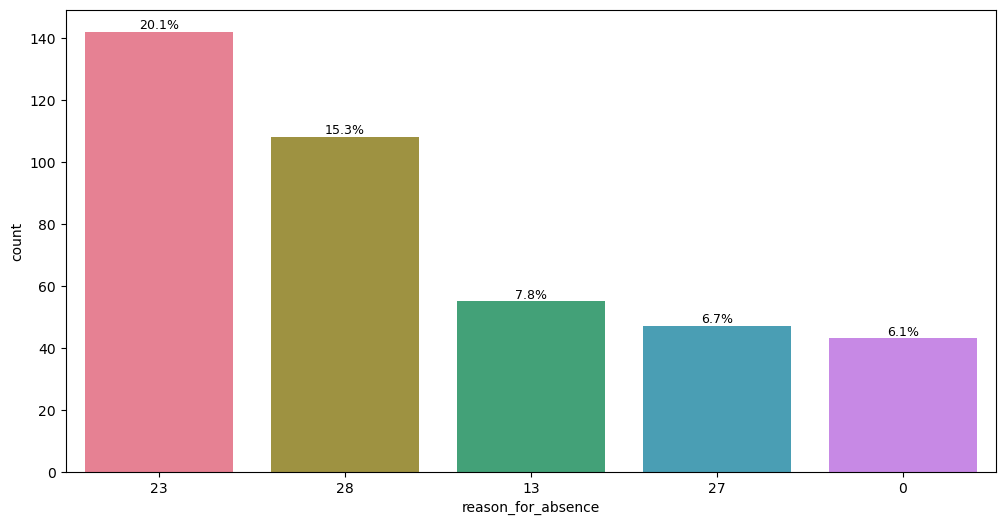

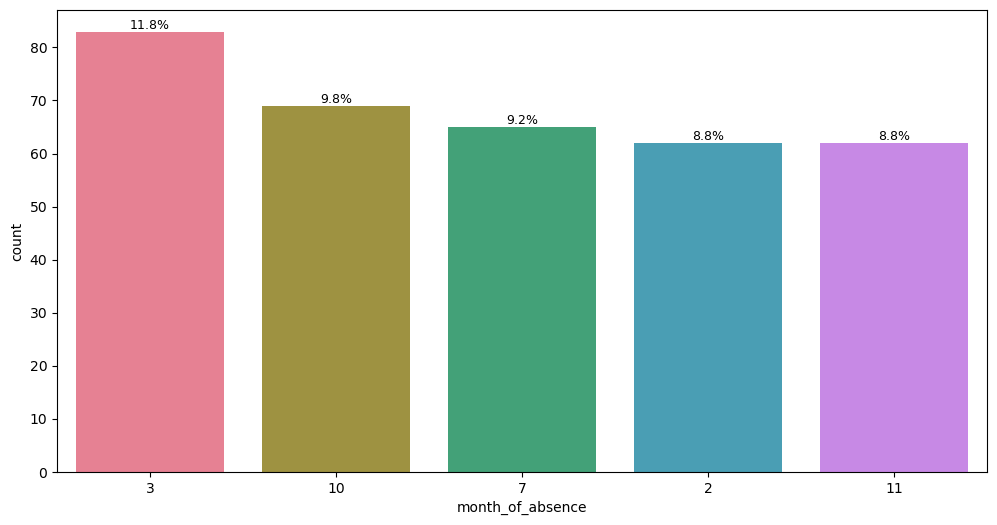

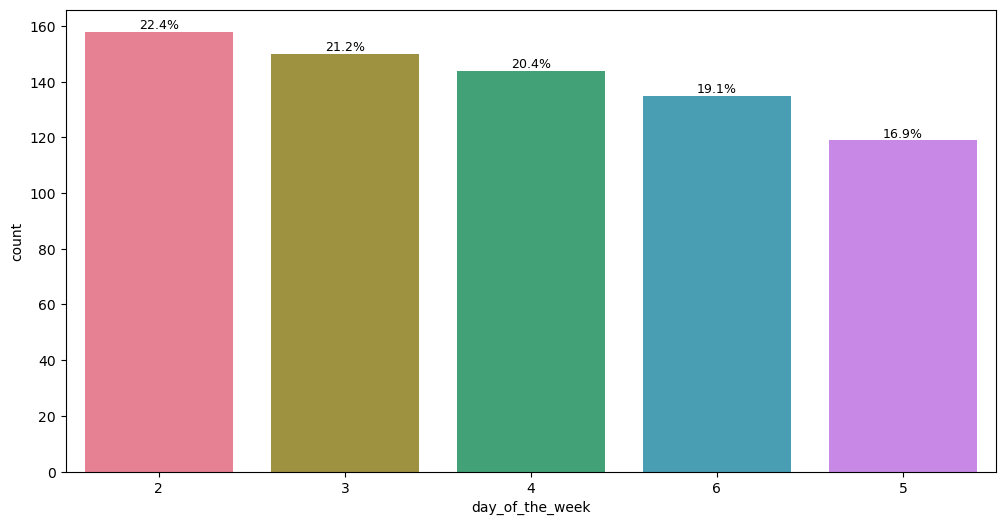

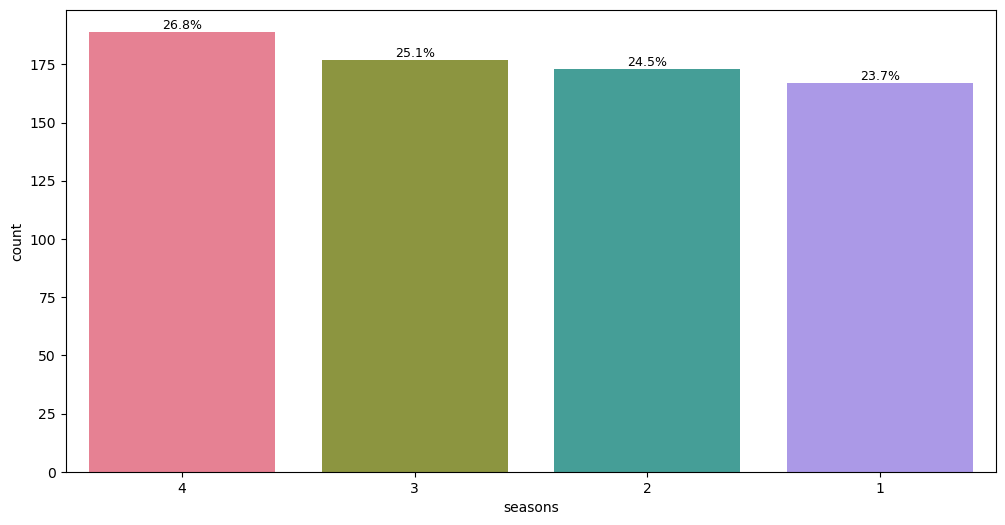

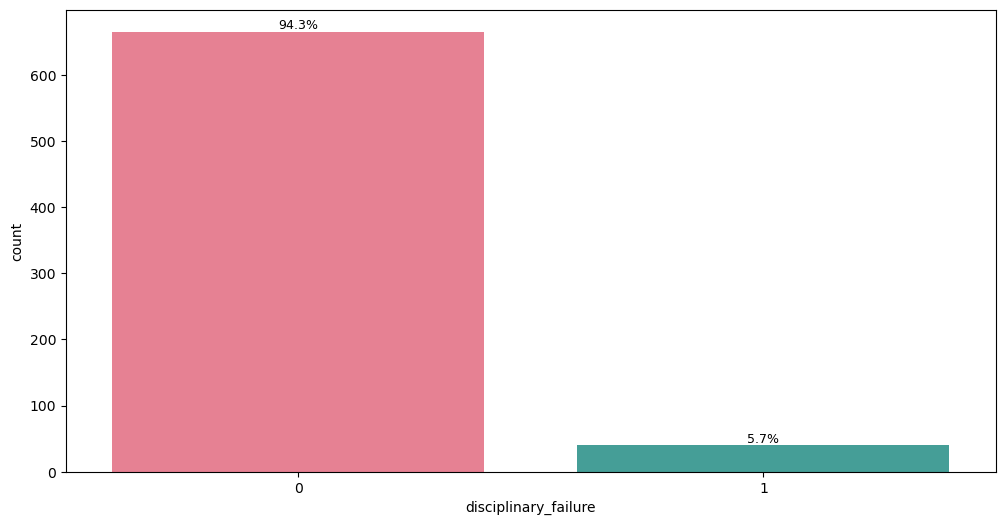

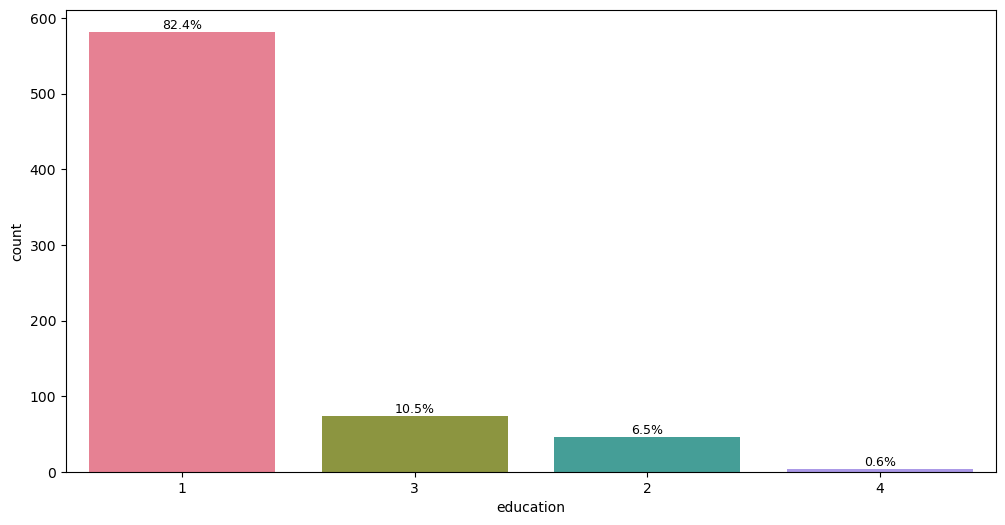

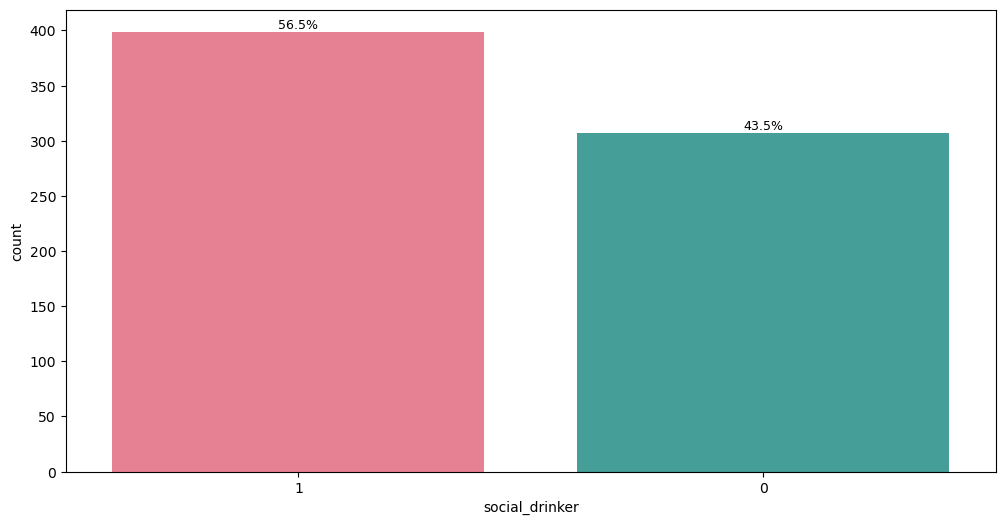

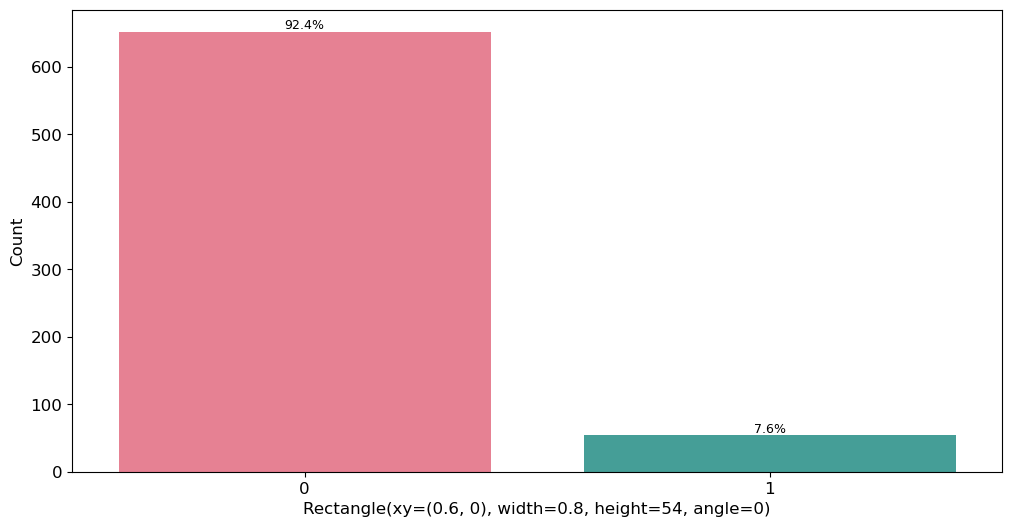

In [36]:
for i in categorical.columns:
    plt.figure(figsize=(12,6))
    desc = df[i].value_counts().index[:5]
    ax=sns.countplot(x=categorical[i], palette='husl',order=desc)
    
    for i in ax.patches:
        percentage = f'{round(i.get_height()/len(df)*100, 1)}%'
        x = i.get_x() + i.get_width() / 2
        y = i.get_height()
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=9)
plt.xlabel(i,size=12)

plt.ylabel('Count',size=12)
plt.xticks(rotation=0,size=12) 
plt.yticks(size=12)
plt.show()


In [37]:
top_reasons_list = [23, 28, 13, 27, 0]
top_reasons_for_absence = df[df['reason_for_absence'].isin(top_reasons_list)].copy()

In [38]:
def reason(x):
    if x==23:
        return 'Medical consultation'
    elif x==28:
        
        return 'Dental consultation.'
    elif x==13:
        return 'Diseases of the muscles'
    elif x ==27:
        return 'physiotherapy'
    elif x==0 :
        return 'Reason Not Specified'
top_reasons_for_absence['reason_cat'] = top_reasons_for_absence['reason_for_absence'].apply(reason)

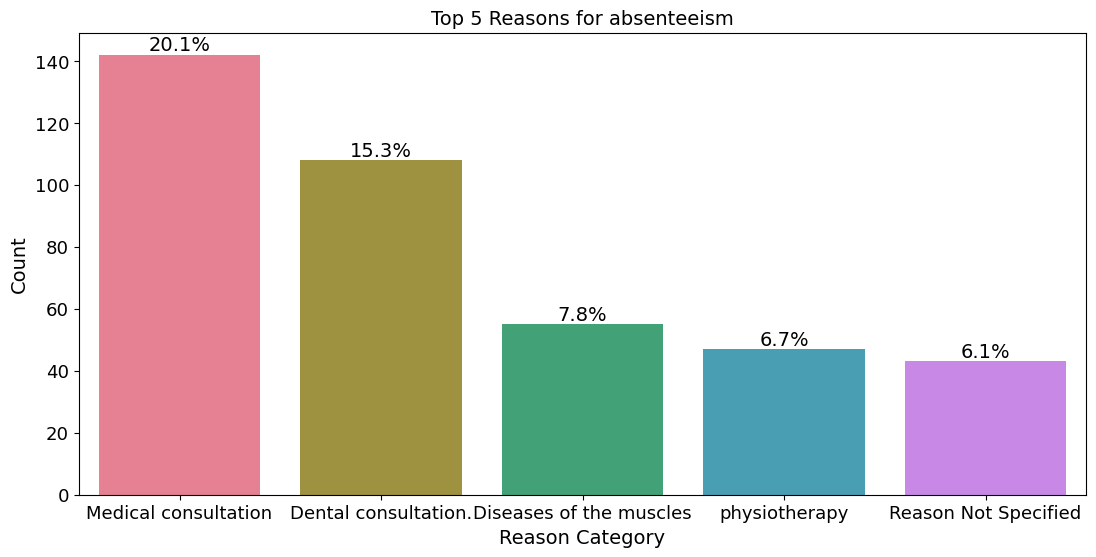

In [39]:

plt.figure(figsize=(13, 6))
desc = top_reasons_for_absence['reason_cat'].value_counts().index[:5]
ax = sns.countplot(x=top_reasons_for_absence['reason_cat'], palette='husl', order=desc)

for i in ax.patches:
    percentage = f'{round(i.get_height() / len(df) * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=14)
plt.title('Top 5 Reasons for absenteeism',size=14)
plt.xlabel('Reason Category', size=14)
plt.ylabel('Count', size=14)
plt.xticks( size=13)
plt.yticks(size=13)
plt.show()

In [40]:
top_reasons_for_absence['reason_cat'].value_counts()

Medical consultation       142
Dental consultation.       108
Diseases of the muscles     55
physiotherapy               47
Reason Not Specified        43
Name: reason_cat, dtype: int64

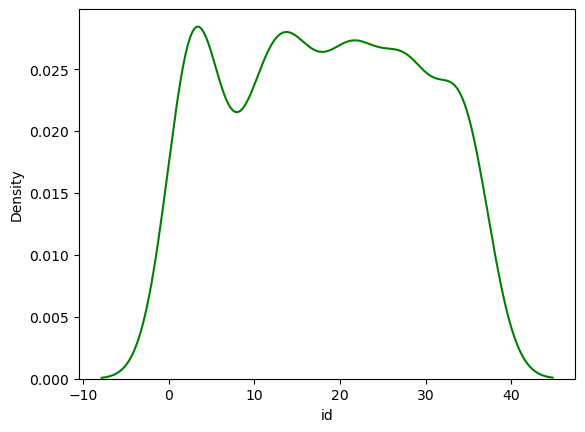

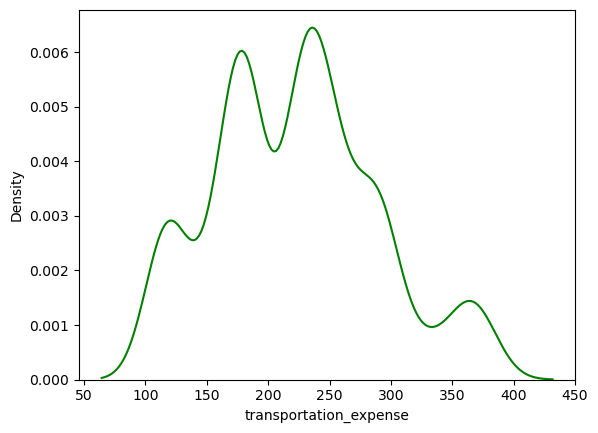

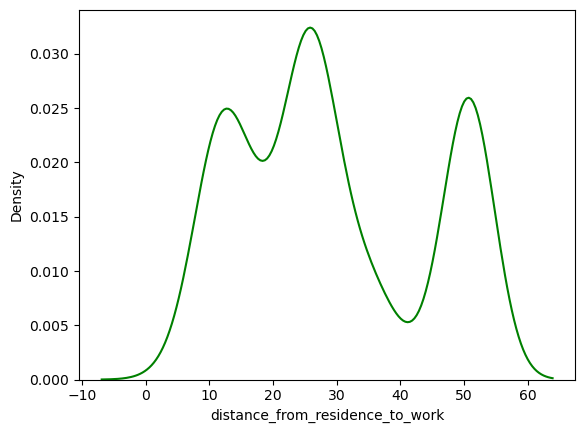

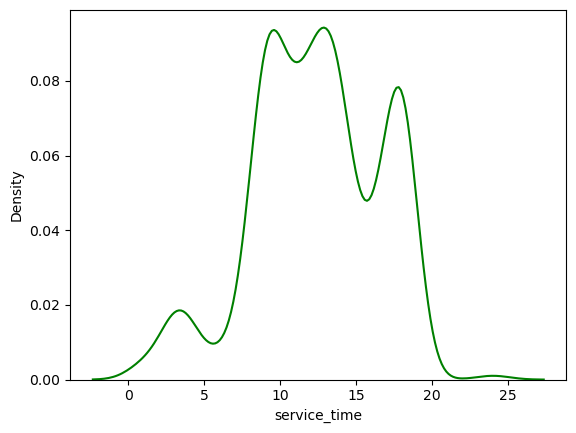

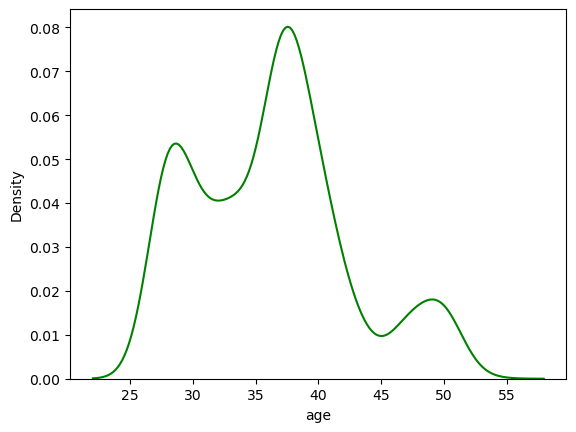

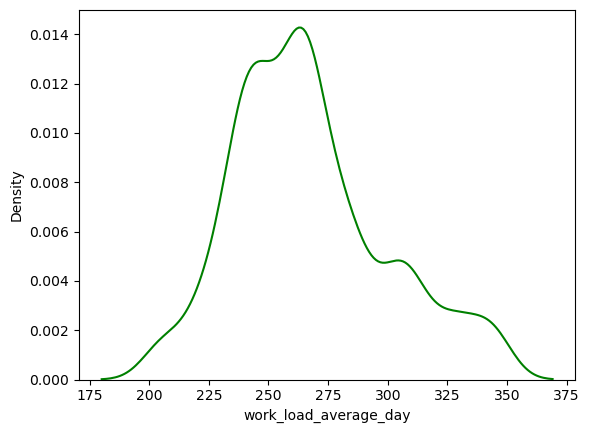

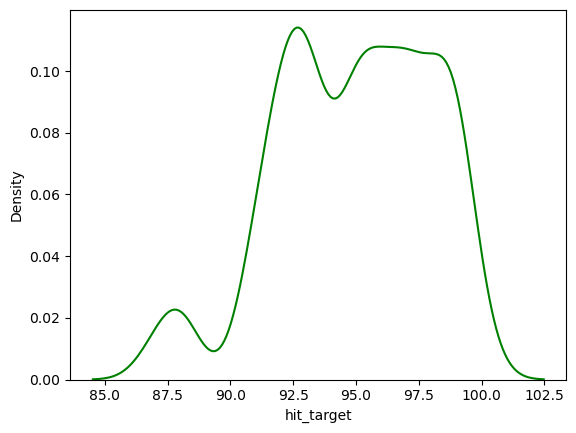

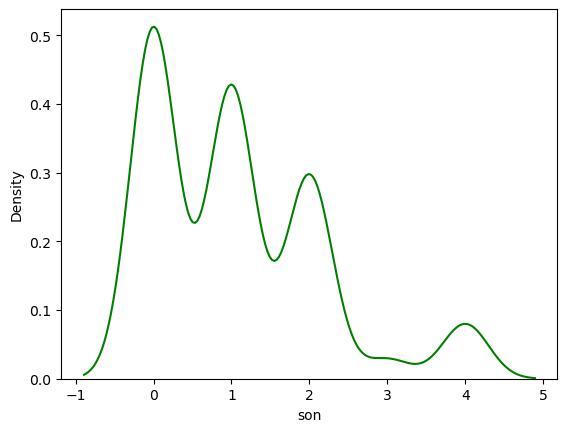

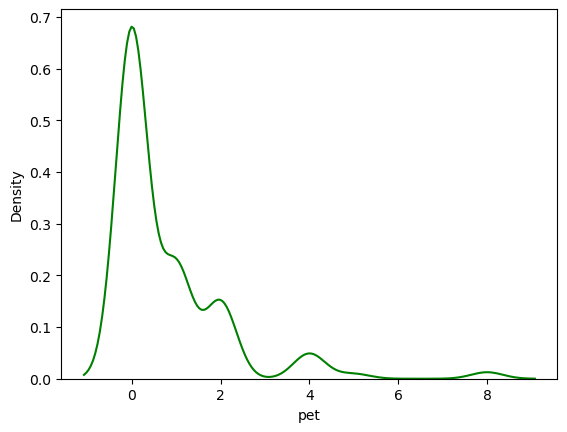

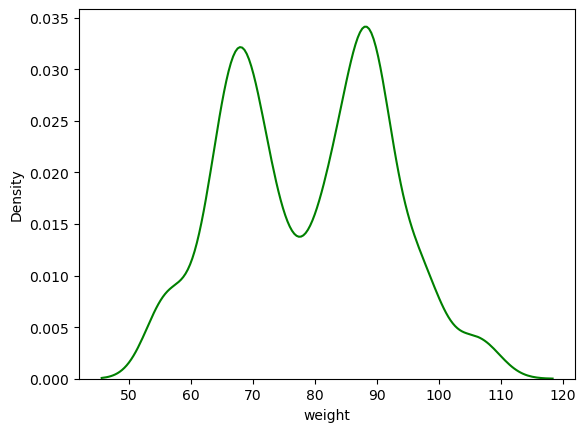

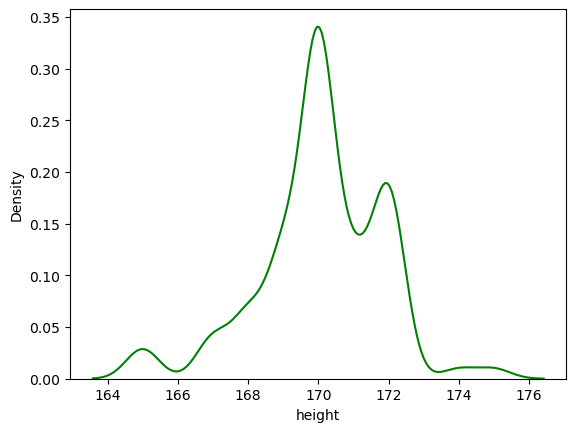

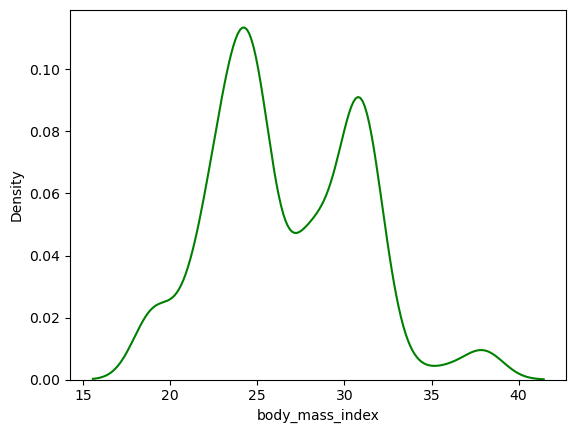

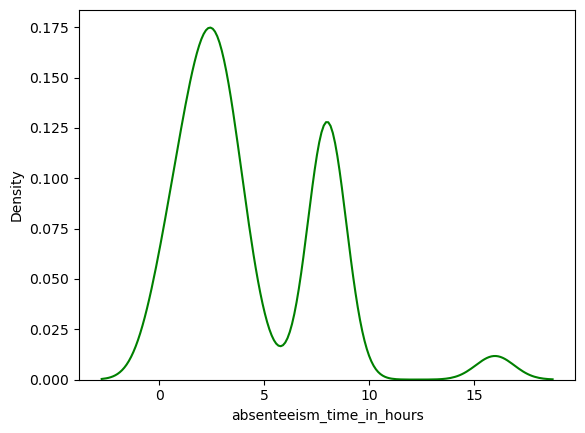

In [41]:
for i in numerical:
    ax = sns.kdeplot(numerical[i],color='green')
    plt.show()

##### Bi-Variate

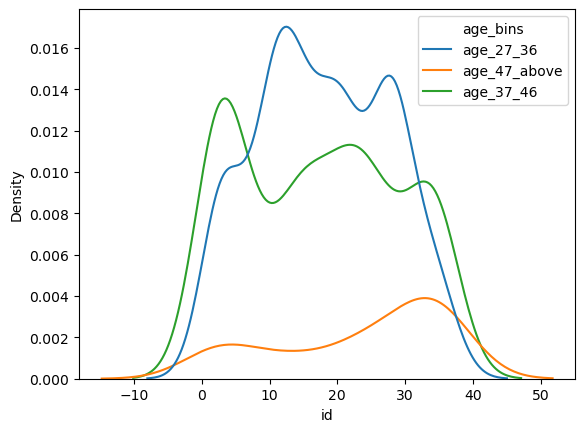

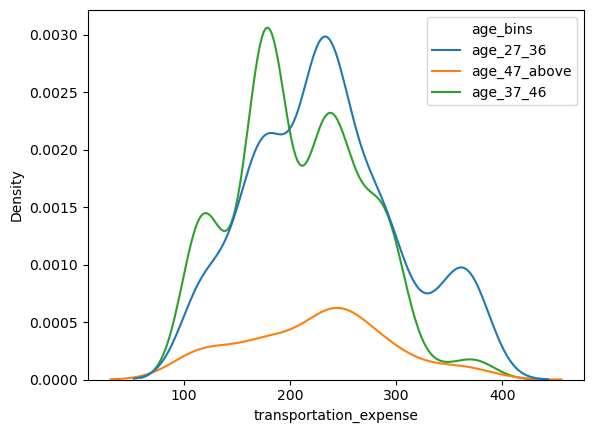

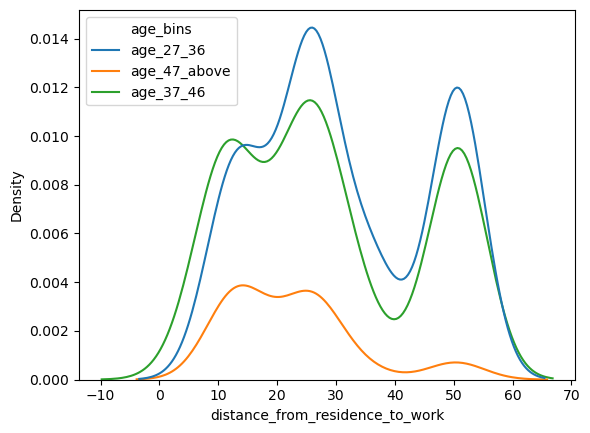

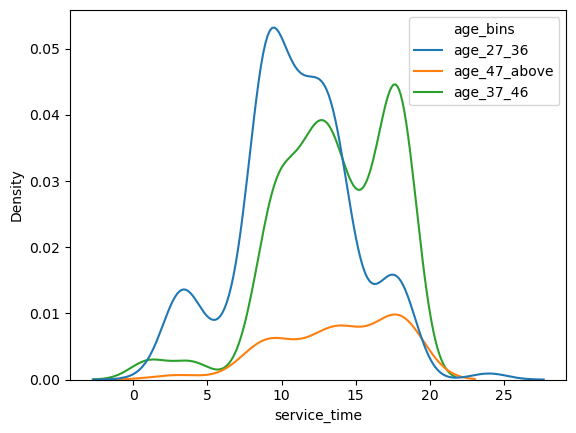

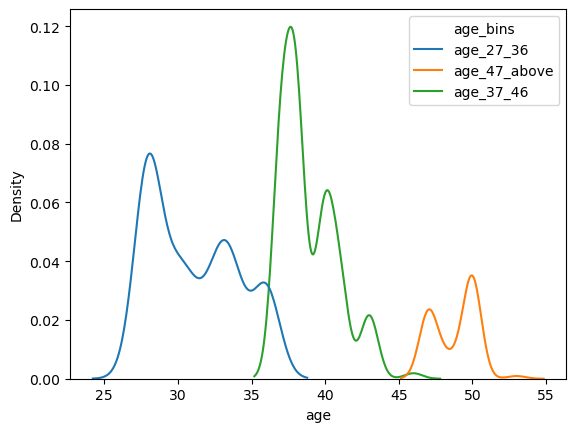

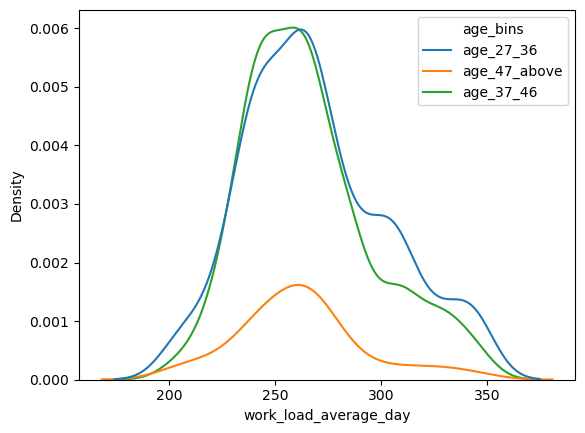

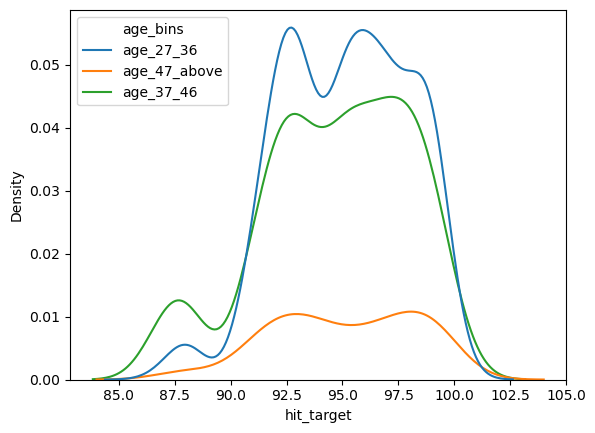

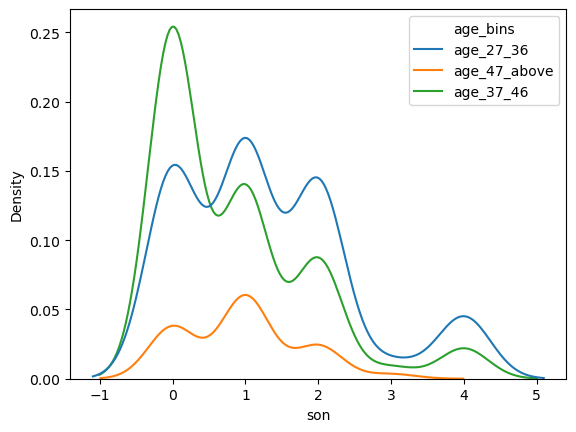

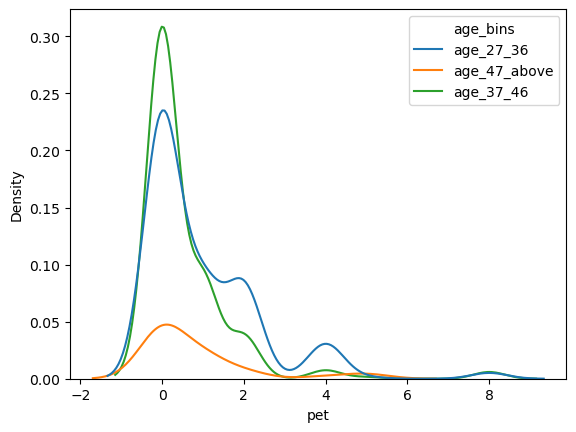

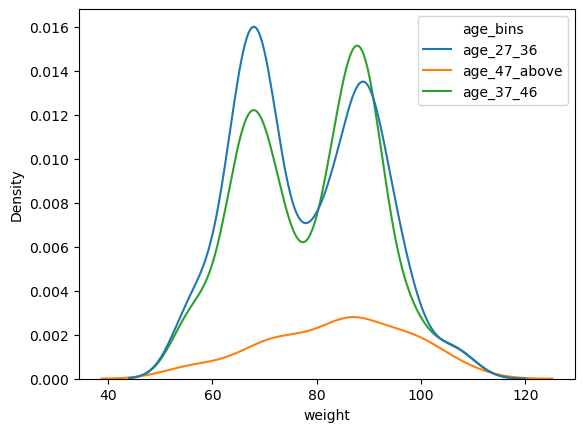

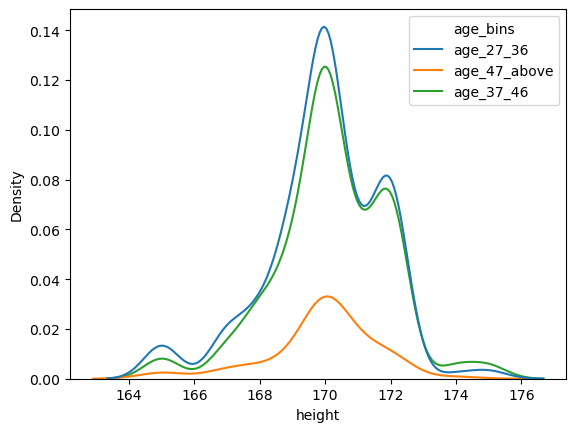

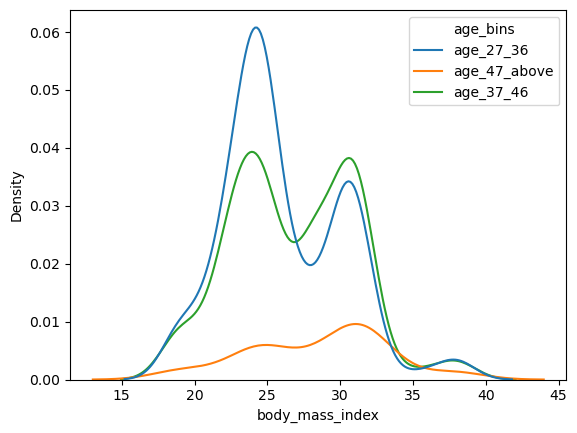

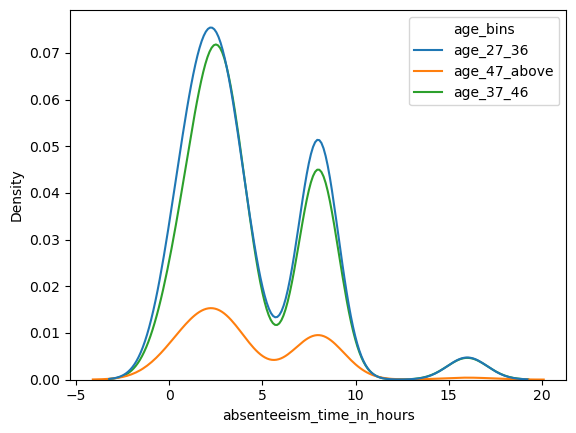

In [42]:
# work_load impact on age 
for i in numerical.columns:
    ax = sns.kdeplot(x=df[i],hue=df['age_bins'])
    plt.show()

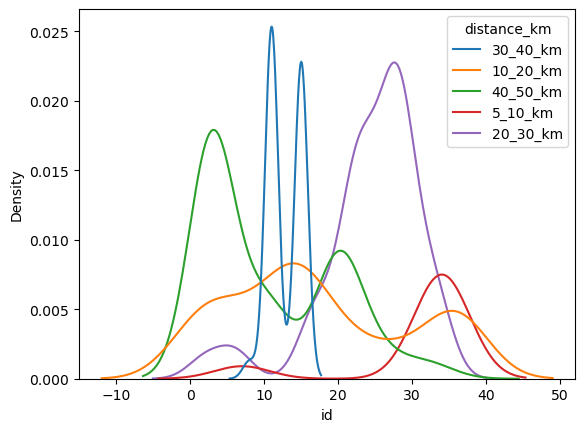

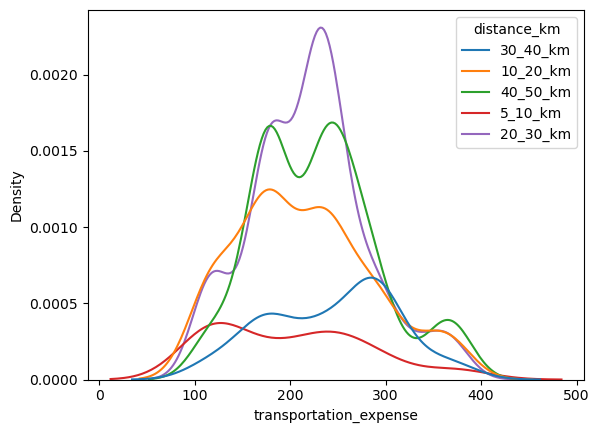

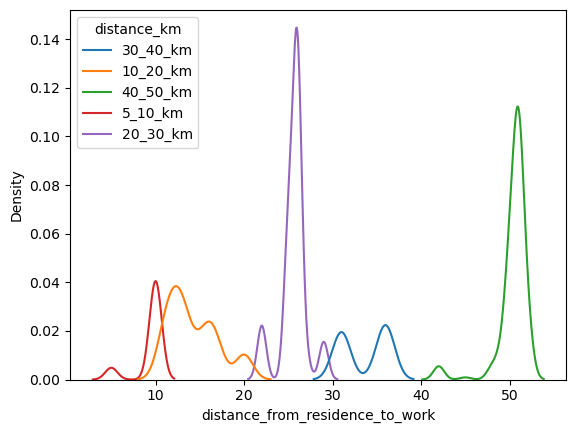

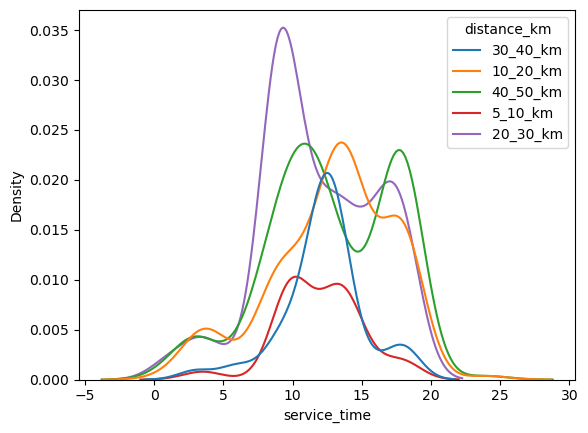

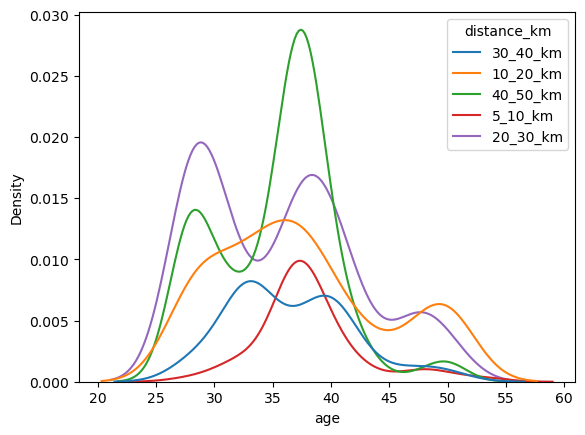

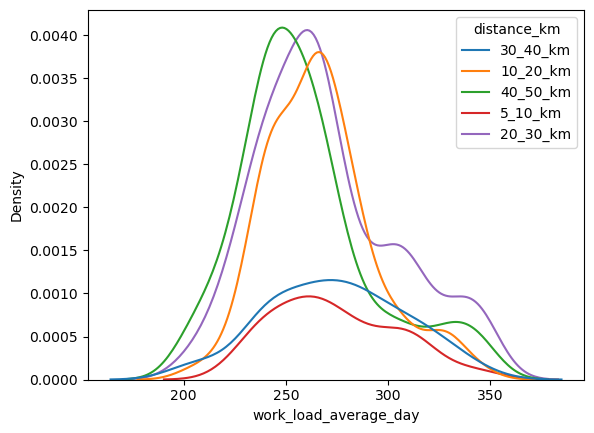

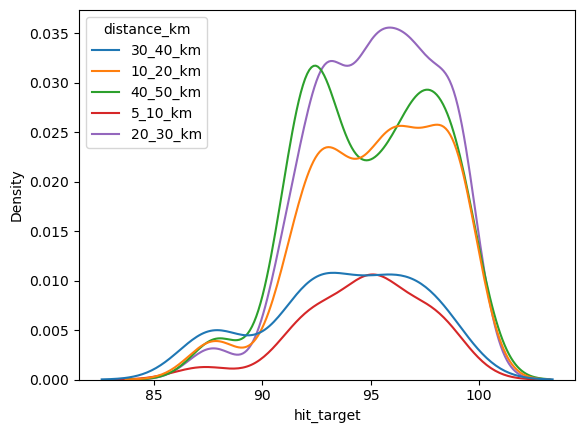

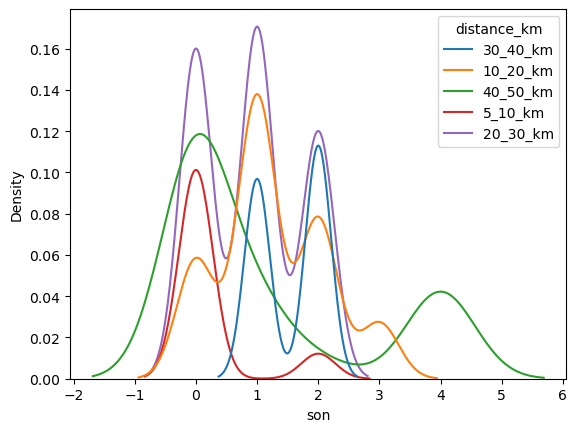

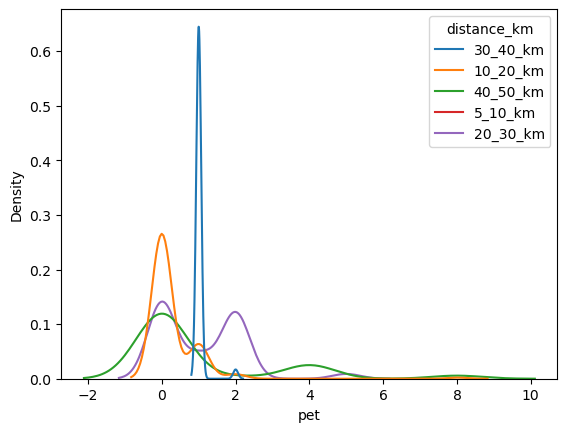

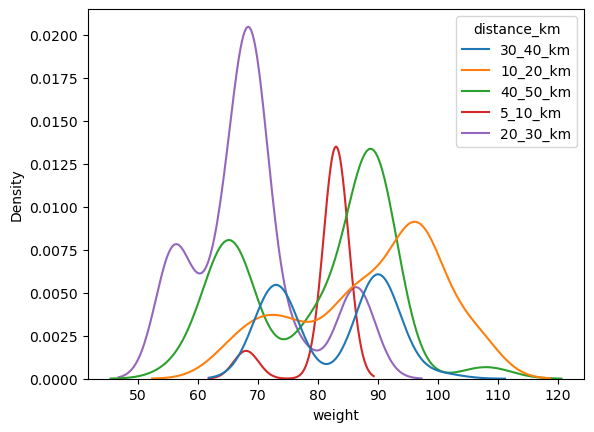

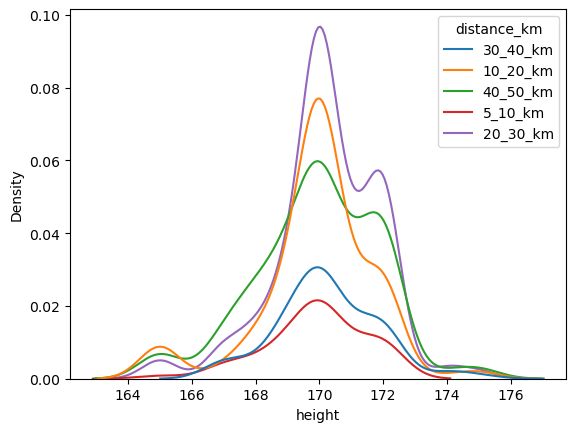

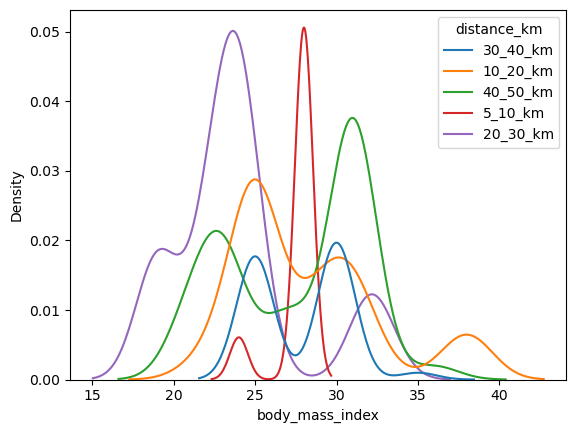

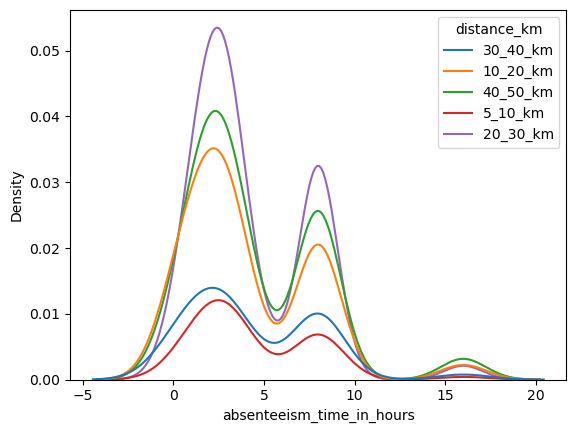

In [43]:
for i in numerical.columns:
    ax = sns.kdeplot(x=df[i],hue=df['distance_km'])
    plt.show()

##### Multivariate

In [44]:
df.head(3)

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,...,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,age_bins,distance_km
0,11,26,7,3,1,289.0,36,13.0,33.0,239.554001,...,2,1,0,1,90,172.0,30,4.0,age_27_36,30_40_km
1,36,0,7,3,1,118.0,13,18.0,50.0,239.554001,...,1,1,0,0,98,170.0,31,0.0,age_47_above,10_20_km
2,3,23,7,4,1,179.0,51,18.0,38.0,239.554001,...,0,1,0,0,89,168.0,31,2.0,age_37_46,40_50_km


In [45]:
top_5_absenteesim=df.groupby(['id'])['absenteeism_time_in_hours'].sum().reset_index()
top_5_absenteesim.sort_values('absenteeism_time_in_hours',ascending=False)

# TOTAL 15 EMPLOYEES ARE CROSSING 70 HOURS 

,id,absenteeism_time_in_hours
2,3,415.0
27,28,327.0
33,34,217.0
10,11,201.0
19,20,164.0
35,36,157.0
21,22,150.0
23,24,143.0
14,15,139.0
9,10,117.0


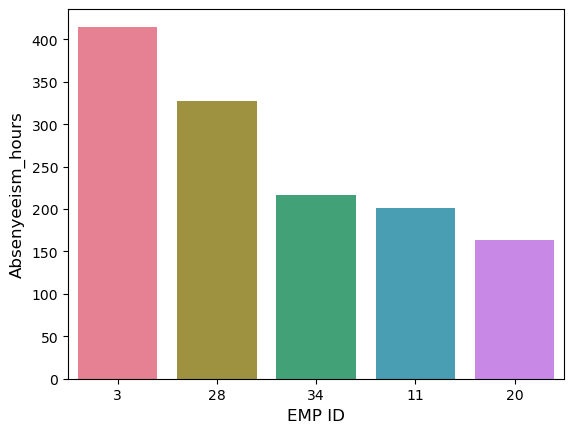

In [46]:


top_5=top_5_absenteesim.sort_values(by='absenteeism_time_in_hours',ascending=False)[:5]
desc = top_5['id'].value_counts().index[:5]
sns.barplot(x=top_5['id'],y=top_5['absenteeism_time_in_hours'],order=desc,palette='husl')
total = len(df)
for i in ax.patches:
    
    percentage = f'{round(i.get_height() / total* 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=10)
plt.xlabel('EMP ID', size=12)
plt.ylabel('Absenyeeism_hours', size=12)
plt.xticks( size=10)
plt.yticks(size=10)
plt.show()


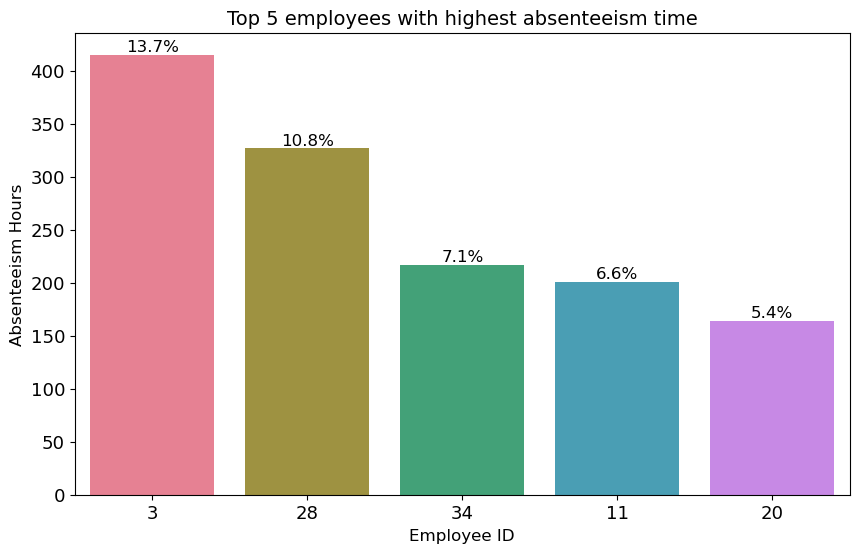

In [47]:
top_5 = top_5_absenteesim.sort_values(by='absenteeism_time_in_hours', ascending=False)[:5]
desc = top_5['id'].value_counts().index[:5]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5['id'], y=top_5['absenteeism_time_in_hours'], order=desc, palette='husl')
total = sum(df['absenteeism_time_in_hours'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Employee ID', size=12)
plt.ylabel('Absenteeism Hours', size=12)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Top 5 employees with highest absenteeism time', size=14)
plt.show()

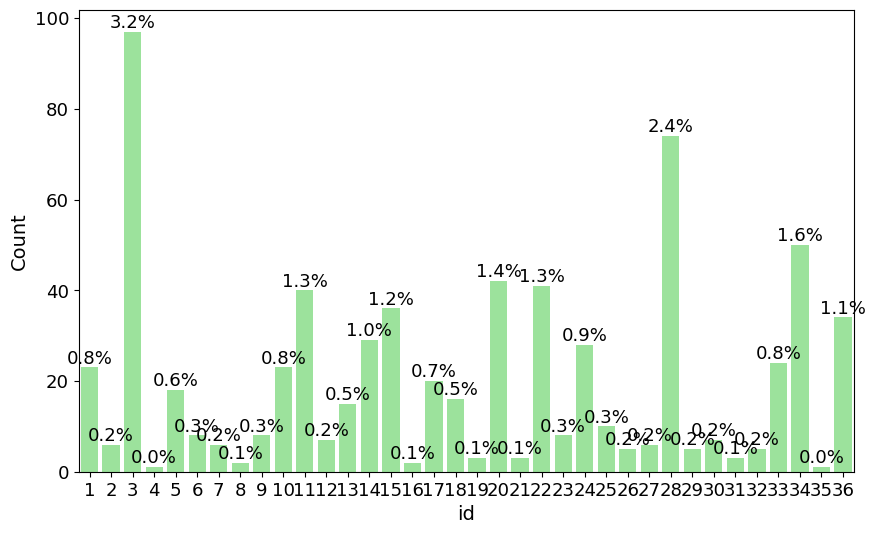

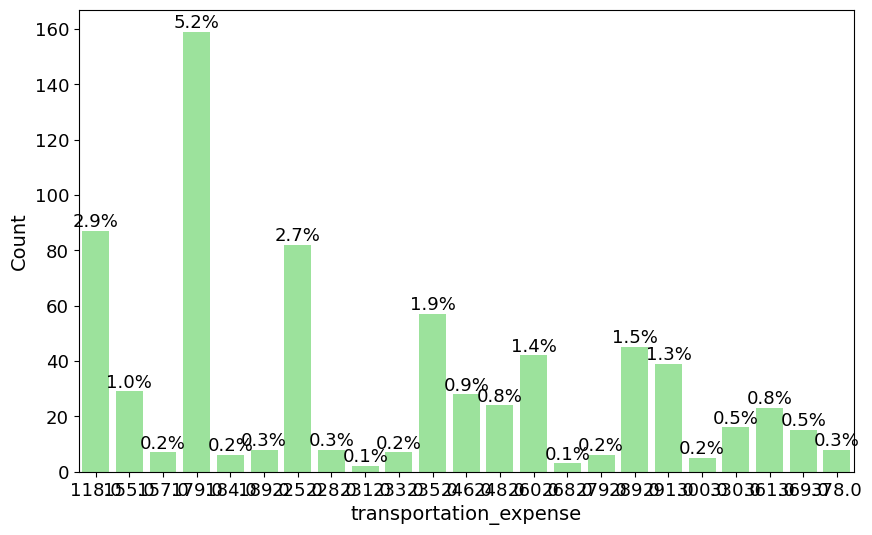

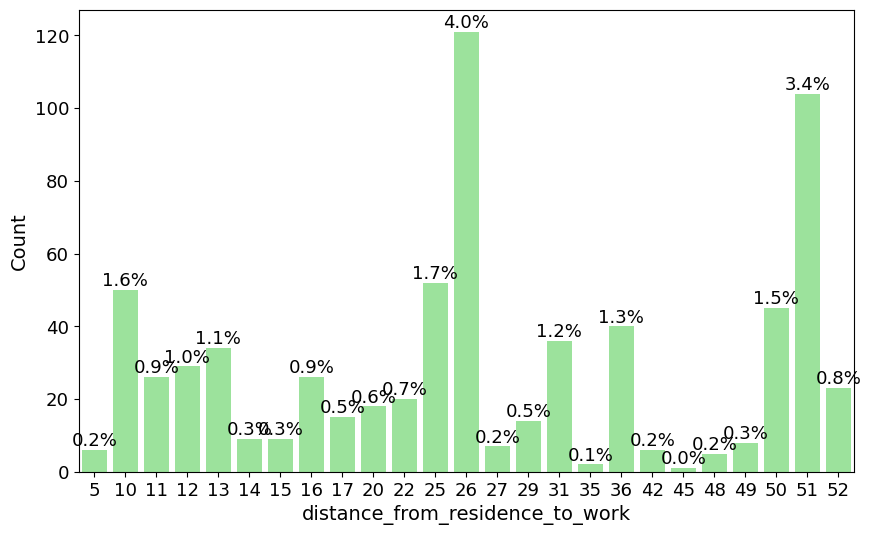

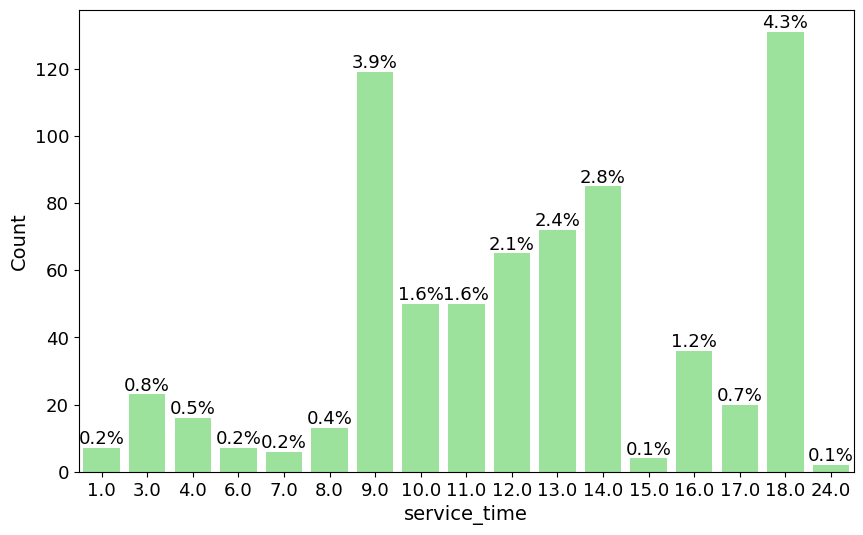

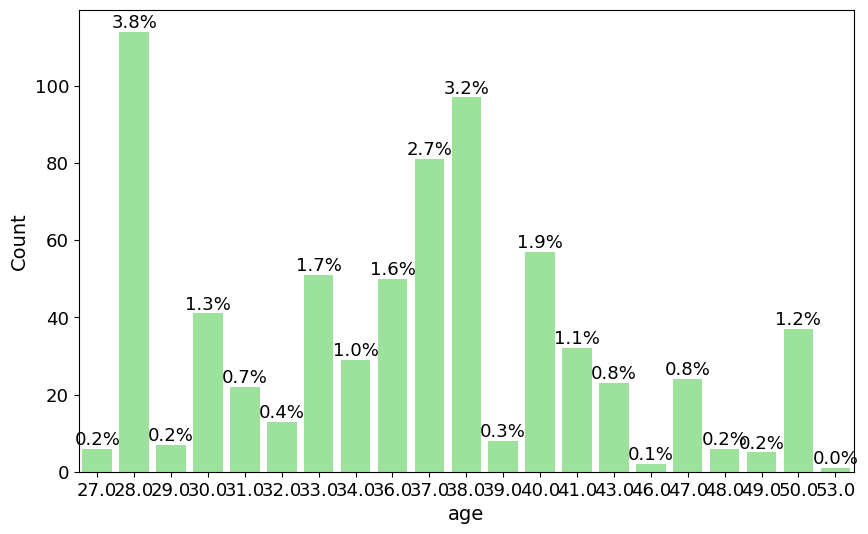

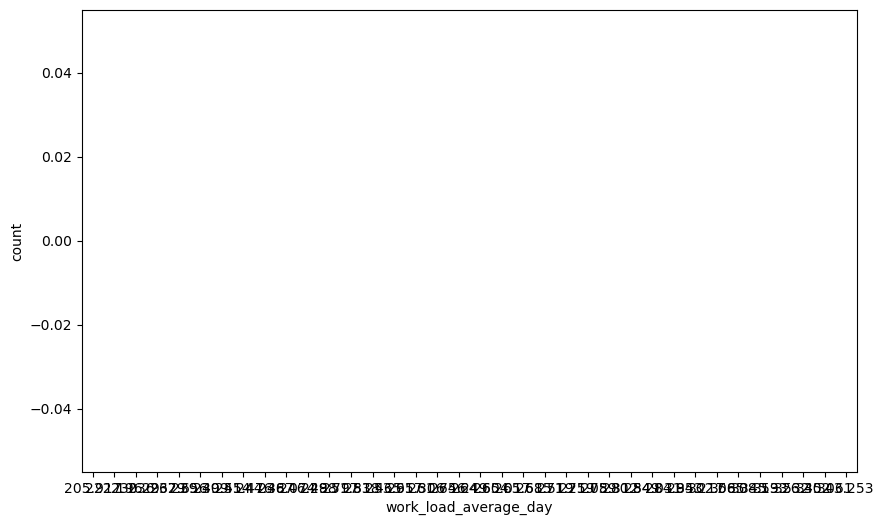

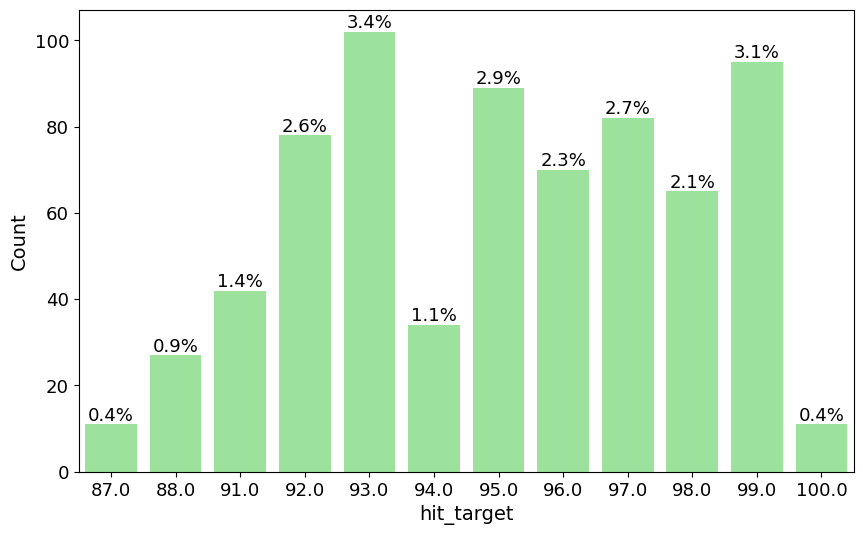

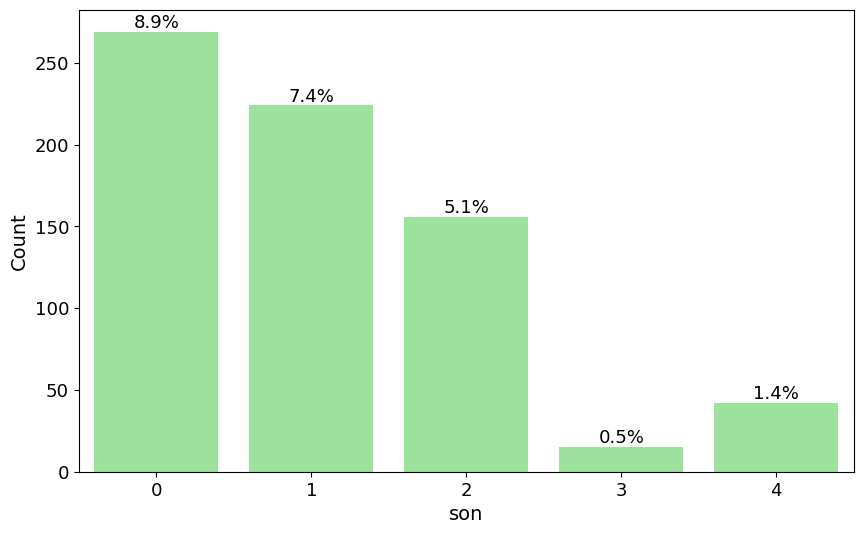

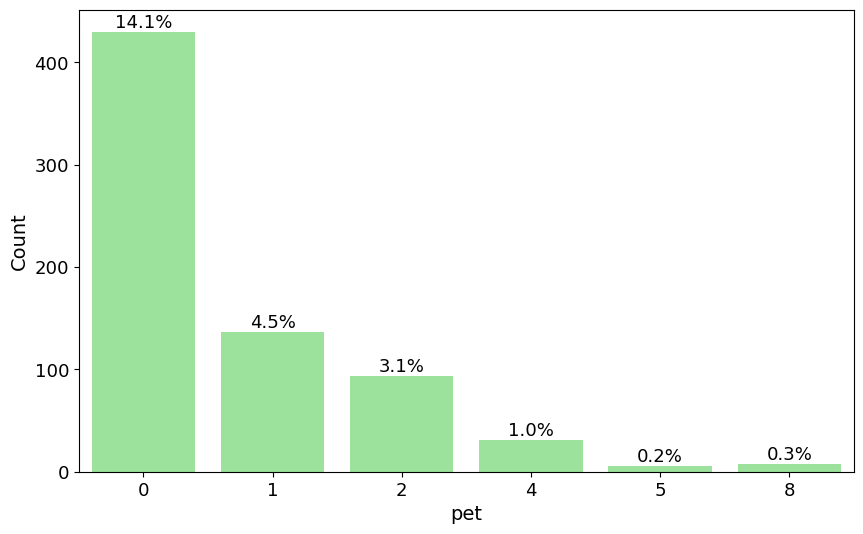

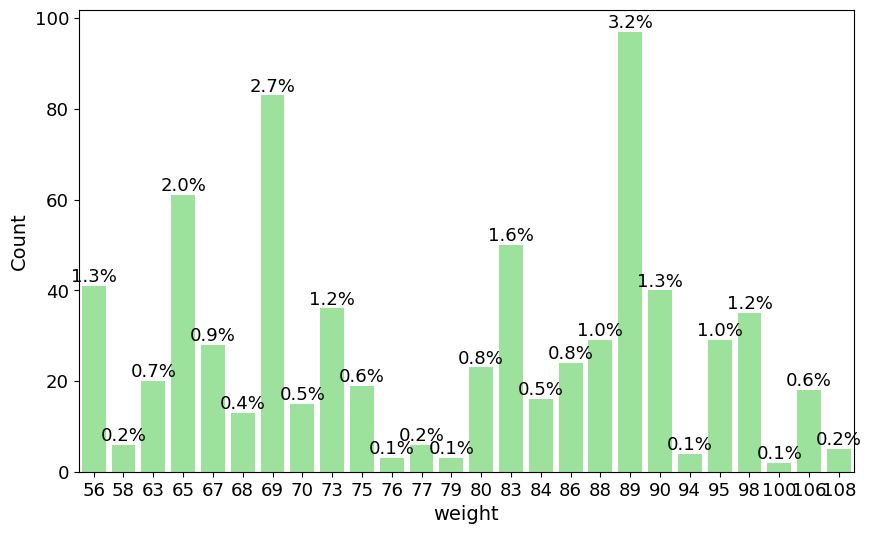

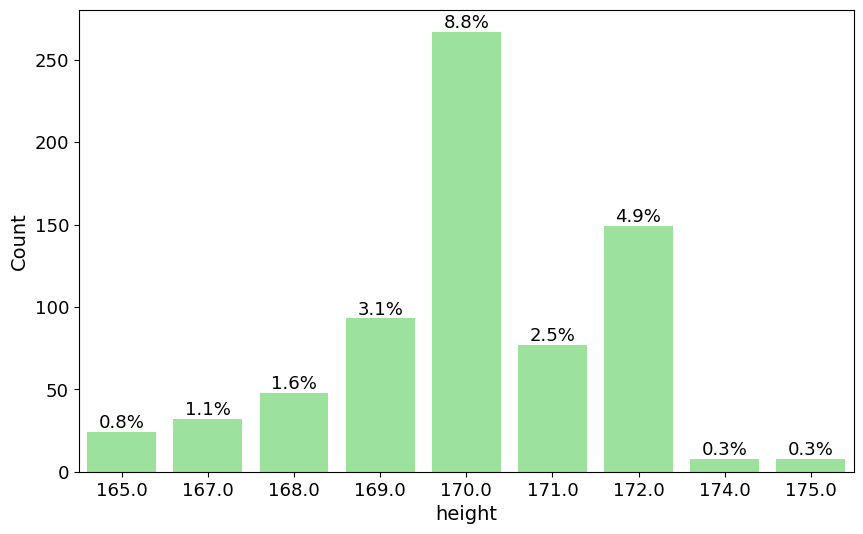

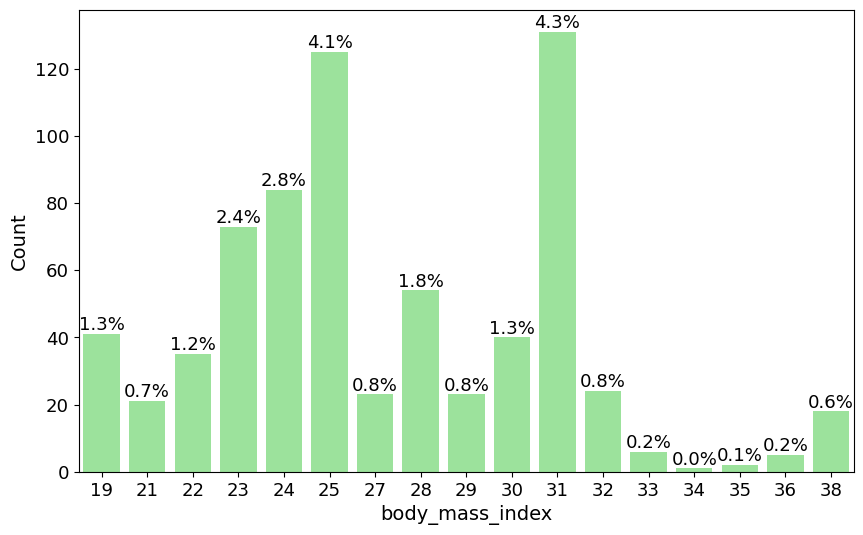

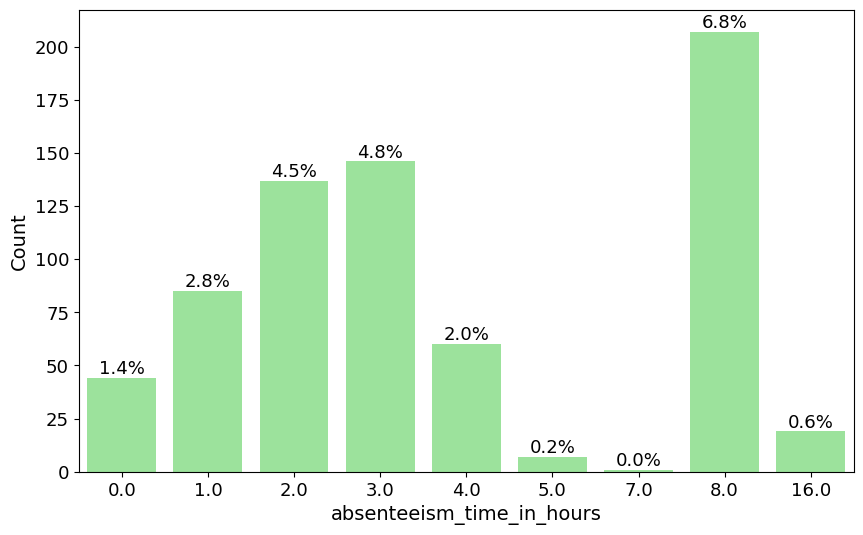

In [48]:
for i in numerical:
    
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x=numerical[i],color='lightgreen')
    total = sum(df['absenteeism_time_in_hours'])
    for bar in ax.patches:
        percentage = f'{round(bar.get_height() / total * 100, 1)}%'
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=13)

        plt.xlabel(i, size=14)
        plt.ylabel( 'Count',size=14)
        plt.xticks(size=13)
        plt.yticks(size=13)
    
    plt.show()

Text(0, 0.5, 'Density')

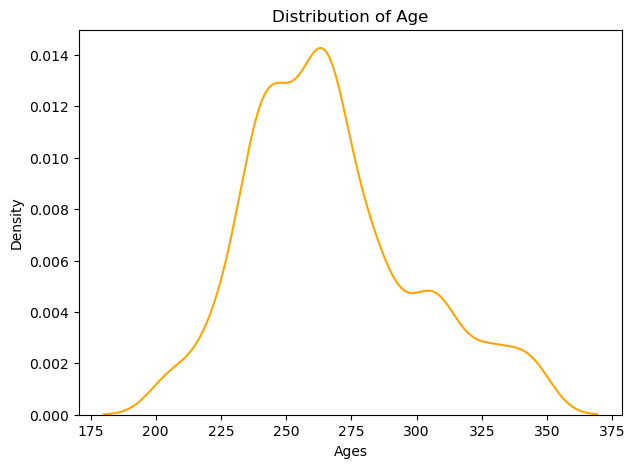

In [49]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['work_load_average_day'],color='orange')
plt.title('Distribution of Age')
plt.xlabel('Ages')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

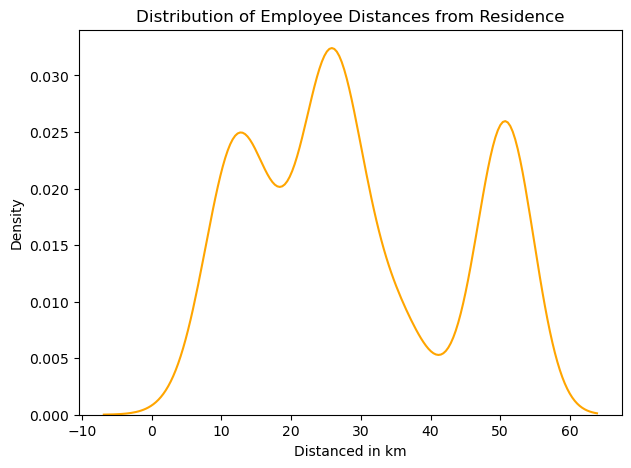

In [50]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['distance_from_residence_to_work'],color='orange')
plt.title('Distribution of Employee Distances from Residence')
plt.xlabel('Distanced in km')
plt.ylabel('Density')

In [51]:
def time(x):
    if x<4:
        return '1-4 hours'
    if x>=5 and x<=8:
        return '5-8 hours'
    if x>=9 and x<=12:
        return '9-12 hours'
    if x>=13 and x<=16:
        return '13-16 hours'
df['abs_time'] = df['absenteeism_time_in_hours'].apply(time)

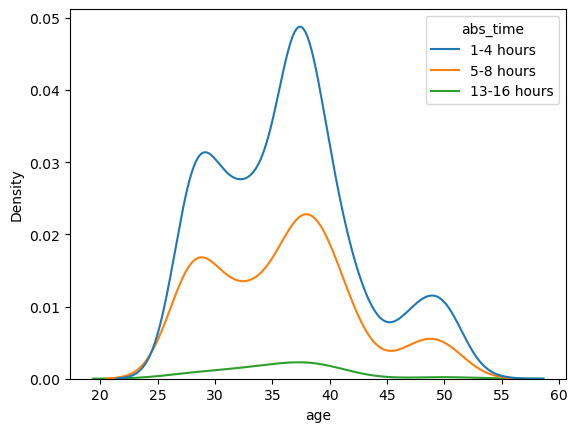

In [52]:
sns.kdeplot(x=df['age'],hue=df['abs_time']);

In [53]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average_day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours', 'age_bins', 'distance_km', 'abs_time'],
      dtype='object')

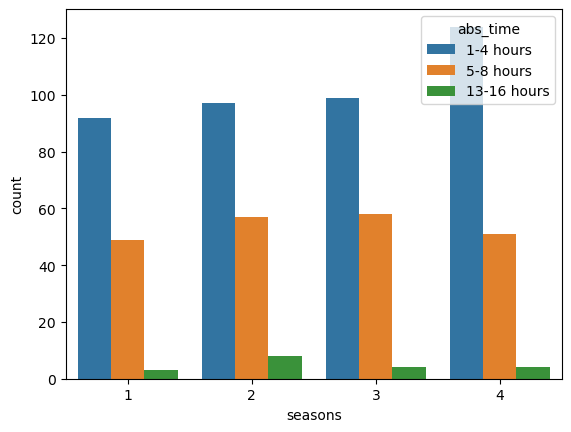

In [54]:
sns.countplot(x=df['seasons'],hue=df['abs_time']);

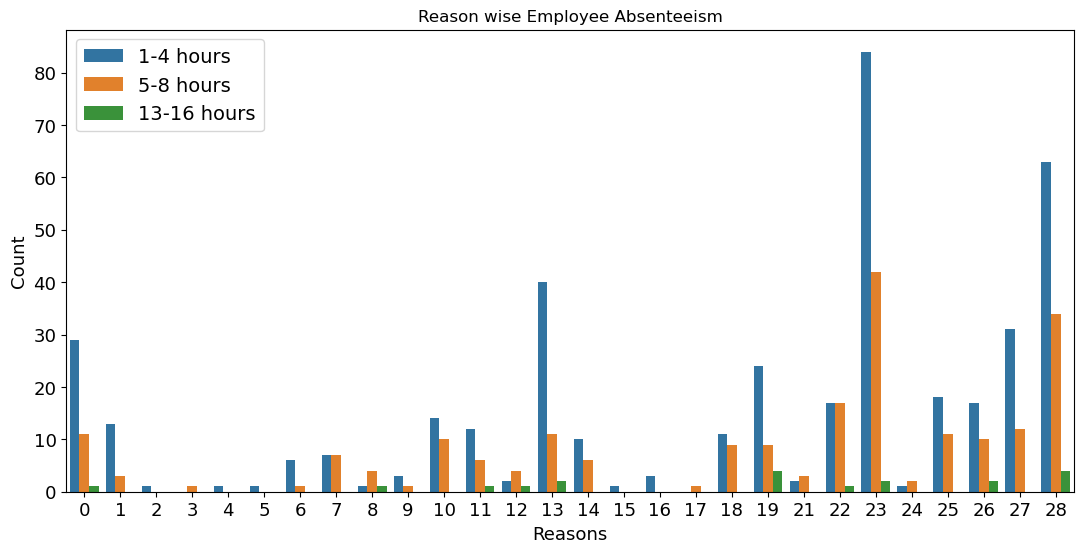

In [55]:
plt.figure(figsize=(13,6))
sns.countplot(x=df['reason_for_absence'], hue=df['abs_time'])
plt.title('Reason wise Employee Absenteeism')
plt.xlabel('Reasons', size=13)
plt.legend(loc='upper left',fontsize=14)
plt.ylabel('Count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

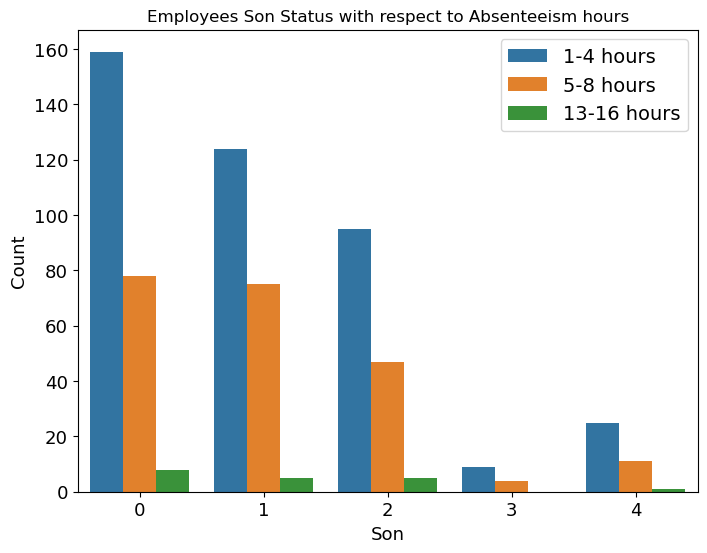

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['son'], hue=df['abs_time'])
plt.title('Employees Son Status with respect to Absenteeism hours')
plt.xlabel('Son', size=13)
plt.legend(loc='upper right',fontsize=14)
plt.ylabel('Count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [57]:
df['body_mass_index']

0      30
1      31
2      31
3      24
4      30
       ..
701    30
702    29
703    34
704    35
705    25
Name: body_mass_index, Length: 706, dtype: int8

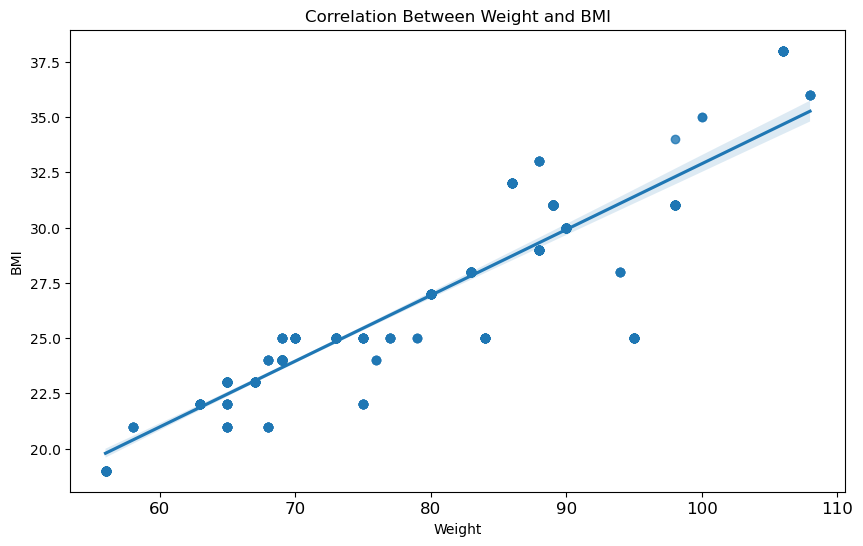

In [58]:
plt.figure(figsize=(10,6))
sns.regplot(x=df['weight'],y=df['body_mass_index'])
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Correlation Between Weight and BMI')
plt.xticks(size=12)
plt.xticks(size=12)
plt.show()

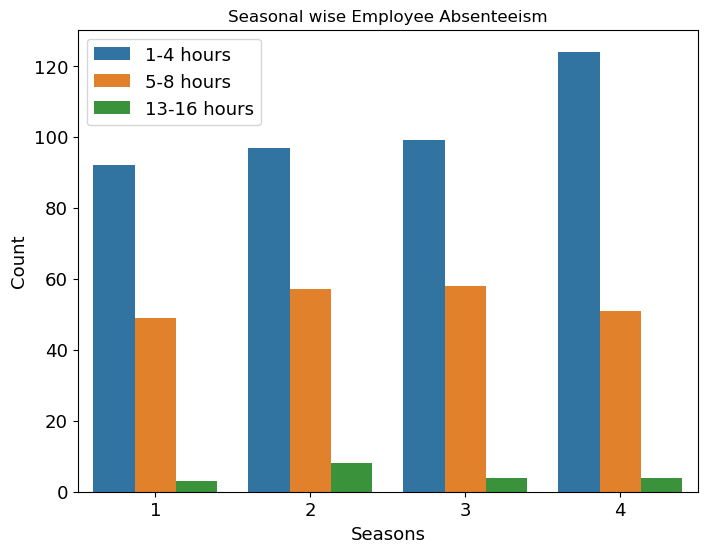

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['seasons'], hue=df['abs_time'])
plt.title('Seasonal wise Employee Absenteeism')
plt.xlabel('Seasons', size=13)
plt.legend(loc='upper left',fontsize=13)
plt.ylabel('Count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

<AxesSubplot:xlabel='reason_for_absence', ylabel='count'>

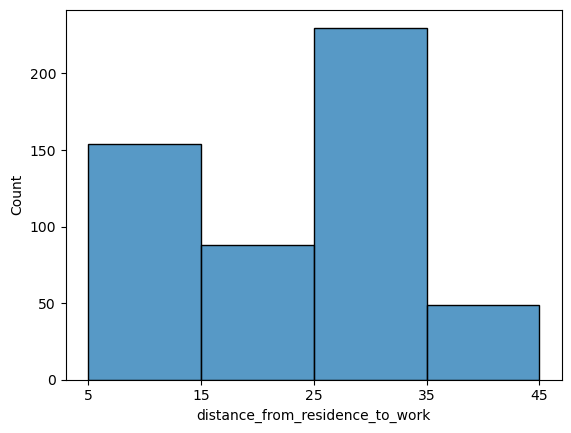

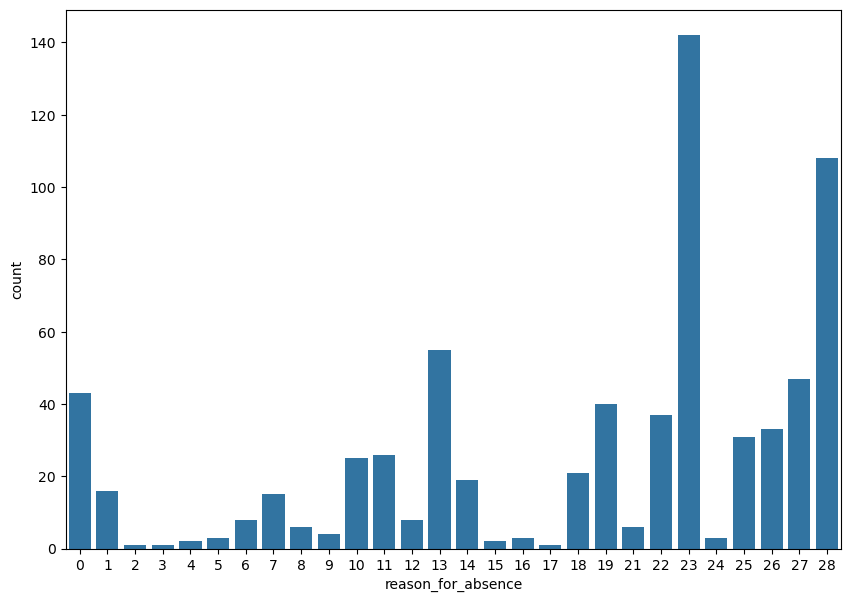

In [60]:
#  min distance to work is -10 that could have been checked
#  x-axis for histogram is wrong due to which analysis on reasons for absenteeism is wrong
# columns has classes so used here count plot
# x tics were overlapping
df['distance_from_residence_to_work']=df['distance_from_residence_to_work'].replace(-10,df['distance_from_residence_to_work'].median())
df[df['distance_from_residence_to_work']==-10]
my_bins = range(5,50,10)
sns.histplot(x=df['distance_from_residence_to_work'],bins=my_bins)
plt.xticks(range(5, 50, 10));

plt.figure(figsize=(10,7))
sns.countplot(x=df['reason_for_absence'])

In [61]:
from ipywidgets import interact
import ipywidgets as widgets
def wid(dataset):
    control = dataset
    
    if control == "age":
        plt.figure(figsize=(10,6))
        data=df['age']
        sns.countplot(x=df['age'],color='orange',hue=df['social_drinker'])
        plt.xticks(rotation=90)
        plt.show()
    elif control=="reason_for_absence":
        plt.figure(figsize=(10,6))
        data = df['reason_for_absence']
        sns.countplot(x=df['reason_for_absence'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "month_of_absence":
        plt.figure(figsize=(10,6))
        data = df['month_of_absence']
        sns.countplot(x=df['month_of_absence'],color='orange',hue=df['social_drinker'])
        plt.xticks(rotation=90)
        plt.show()
    elif control== "day_of_the_week":
        plt.figure(figsize=(10,6))
        data = df['day_of_the_week']
        sns.countplot(x=df['day_of_the_week'],color='orange',hue=df['social_smoker'])
        plt.xticks(rotation=90)
        plt.show()
    elif control== "seasons":
        plt.figure(figsize=(10,6))
        data = df['seasons']
        sns.countplot(x=df['seasons'],color='orange',hue=df['social_drinker'])
        plt.xticks(rotation=90)
        plt.show()
    elif control== "transportation_expense":
        plt.figure(figsize=(10,6))
        data = df['transportation_expense']
        sns.countplot(x=df['transportation_expense'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "distance_from_residence_to_work":
        plt.figure(figsize=(10,6))
        data = df['distance_from_residence_to_work']
        sns.countplot(x=df['distance_from_residence_to_work'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "service_time":
        plt.figure(figsize=(10,6))
        data = df['service_time']
        sns.countplot(x=df['service_time'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "work_load_average_day":
        plt.figure(figsize=(10,6))
        data = df['work_load_average_day']
        sns.countplot(x=df['work_load_average_day'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "hit_target":
        plt.figure(figsize=(10,6))
        data = df['hit_target']
        sns.countplot(x=df['hit_target'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "disciplinary_failure":
        plt.figure(figsize=(10,6))
        data = df['disciplinary_failure']
        sns.countplot(x=df['disciplinary_failure'],color='orange',hue=df['social_drinker'])
        plt.xticks(rotation=90)
        plt.show()
    elif control== "education":
        plt.figure(figsize=(10,6))
        data = df['education']
        sns.countplot(x=df['education'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "weight":
        plt.figure(figsize=(10,6))
        data = df['weight']
        sns.countplot(x=df['weight'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    elif control== "absenteeism_time_in_hours":
        plt.figure(figsize=(10,6))
        data = df['absenteeism_time_in_hours']
        sns.countplot(x=df['absenteeism_time_in_hours'],color='orange')
        plt.xticks(rotation=90)
        plt.show()
    

    
        
    return dataset

In [62]:
interact(wid, dataset=widgets.RadioButtons(
    options=['age', 'reason_for_absence', 'month_of_absence', 'day_of_the_week', 'seasons', 'transportation_expense', 'distance_from_residence_to_work',
             'service_time', 'work_load_average_day', 'hit_target', 'disciplinary_failure', 'education', 'weight', 'absenteeism_time_in_hours'],
    description='switching', disabled=False));

interactive(children=(RadioButtons(description='switching', options=('age', 'reason_for_absence', 'month_of_ab…

## Machine Learning

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

## Feature ENG  

In [64]:
## Feature ENgineering
df.drop(columns=['id','age_bins','distance_km','abs_time'],inplace=True)

In [65]:
encode_columns = ['reason_for_absence', 'month_of_absence', 'day_of_the_week', 'seasons',
                       'disciplinary_failure', 'education', 'social_drinker', 'social_smoker']
scale_columns = ['transportation_expense', 'distance_from_residence_to_work', 'service_time',
                     'age', 'work_load_average_day', 'hit_target','son','pet', 'weight', 'height', 'body_mass_index',
                     'absenteeism_time_in_hours']

In [66]:
encoder = LabelEncoder()
scaler = StandardScaler()


In [67]:
for i in encode_columns:
    df[i] = encoder.fit_transform(df[i])
for i in scale_columns:
    df[i] = scaler.fit_transform(df[i].to_numpy().reshape(-1,1))

In [68]:
df.head()

,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,25,7,1,0,1.005108,0.456072,0.150924,-0.527706,-0.856842,0.677804,0,0,0.850679,1,0,0.173279,0.855365,1.106466,0.791184,-0.089567
1,0,7,1,0,-1.571114,-1.108954,1.359005,2.240444,-0.856842,0.677804,1,0,-0.055172,1,0,-0.577243,1.477769,-0.033921,1.026373,-1.266026
2,22,7,2,0,-0.652111,1.476741,1.359005,0.286456,-0.856842,0.677804,0,0,-0.961024,1,0,-0.577243,0.777564,-1.174308,1.026373,-0.677797
3,7,7,3,0,0.854451,-1.653311,0.392541,0.449288,-0.856842,0.677804,0,0,0.850679,1,1,-0.577243,-0.856246,1.106466,-0.619955,-0.089567
4,22,7,3,0,1.005108,0.456072,0.150924,-0.527706,-0.856842,0.677804,0,0,0.850679,1,0,0.173279,0.855365,-0.033921,0.791184,-0.677797


### PCA

In [69]:
pca = PCA(n_components=10) 
pca_train = pca.fit_transform(df)
sum(pca.explained_variance_ratio_)*100 ## Minimum Dimensionality Reduce is 5% 


95.28852213259715

### Kmeans with pca

In [70]:
km = KMeans(n_clusters=3)
km.fit(pca_train)
km_labels = km.labels_
sil_score_km_pca=silhouette_score(pca_train,km_labels)*100 ## silhouette_score is 40.91 with PCA

### Kmeans without pca

In [71]:
km_without_pca = KMeans(n_clusters=3)
km_without_pca.fit(df)
km_transform=km_without_pca.fit_transform(df)
labes_km=km_without_pca.labels_
sil_score_km_without_pca=silhouette_score(km_transform,labes_km)*100 ## Silhouette score is 67.35 without PCA

### Aglomerative with pca 

In [72]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(pca_train)
agg_labels = agg.labels_
sil_score_agg_pca=silhouette_score(pca_train,agg_labels)*100  ## Silhouette score is 42.07 with pca 

### Aglomerative without pca 

In [73]:
agg_without_pca = AgglomerativeClustering(n_clusters=3)
fitted = agg_without_pca.fit(df)
label_agg = agg_without_pca.labels_
sil_score_agg_without_pca = silhouette_score(df, label_agg)*100


### DBSCAN with pca 

In [74]:
dbs = DBSCAN(eps=2, min_samples=3)
dbs.fit(pca_train)
dbs_labels = dbs.labels_
sil_score_dbs_pca = silhouette_score(pca_train, dbs_labels) * 100  
sil_score_dbs_pca   # ## Silhouette score is -45.85 with pca

-45.85593514074956

### DBSCAN without pca 

In [75]:
dbs_without_pca = DBSCAN(eps=2, min_samples=3)
dbs_without_pca.fit(df)
labels_dbs = dbs_without_pca.labels_
sil_score_dbs_without_pca = silhouette_score(df, labels_dbs) * 100  
sil_score_dbs_without_pca   # ## Silhouette score is -27.63 with pca

-27.637836927563335

In [76]:
print('kmeans silhouette score with pca-->',sil_score_km_pca)
print('kmeans silhouette score without pca-->',sil_score_km_without_pca)
print('Agglomerative silhouette score with pca-->',sil_score_agg_pca)
print('Agglomerative silhouette score without pca-->',sil_score_agg_without_pca)
print('DBSCAN silhouette score with pca-->',sil_score_dbs_pca)
print('DBSCAN silhouette score without pca-->',sil_score_dbs_without_pca)

kmeans silhouette score with pca--> 40.60675919190299
kmeans silhouette score without pca--> 67.1107741542036
Agglomerative silhouette score with pca--> 42.076890367196704
Agglomerative silhouette score without pca--> 36.002961008231956
DBSCAN silhouette score with pca--> -45.85593514074956
DBSCAN silhouette score without pca--> -27.637836927563335


### KMEANS Silhouette Score is better without PCA --> 67.35

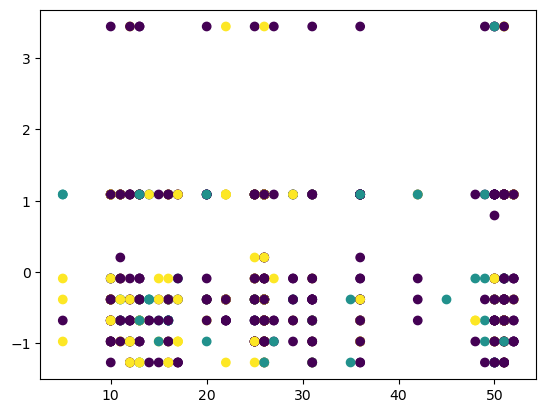

In [77]:
plt.scatter(original_df['distance_from_residence_to_work'],y=df['absenteeism_time_in_hours'],c=labes_km);

### Clusters need to improve

###  Trying with feature selection

In [78]:
df.head()

,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,25,7,1,0,1.005108,0.456072,0.150924,-0.527706,-0.856842,0.677804,0,0,0.850679,1,0,0.173279,0.855365,1.106466,0.791184,-0.089567
1,0,7,1,0,-1.571114,-1.108954,1.359005,2.240444,-0.856842,0.677804,1,0,-0.055172,1,0,-0.577243,1.477769,-0.033921,1.026373,-1.266026
2,22,7,2,0,-0.652111,1.476741,1.359005,0.286456,-0.856842,0.677804,0,0,-0.961024,1,0,-0.577243,0.777564,-1.174308,1.026373,-0.677797
3,7,7,3,0,0.854451,-1.653311,0.392541,0.449288,-0.856842,0.677804,0,0,0.850679,1,1,-0.577243,-0.856246,1.106466,-0.619955,-0.089567
4,22,7,3,0,1.005108,0.456072,0.150924,-0.527706,-0.856842,0.677804,0,0,0.850679,1,0,0.173279,0.855365,-0.033921,0.791184,-0.677797


In [79]:
imp_features = original_df.loc[:,['absenteeism_time_in_hours','reason_for_absence']]
imp_features.head()

,absenteeism_time_in_hours,reason_for_absence
0,4,26
1,0,0
2,2,23
3,4,7
4,2,23


In [80]:
km_with_imp_fea = KMeans(n_clusters=4)
km_with_imp_fea.fit(imp_features)
km_imp_trancsform=km_with_imp_fea.fit_transform(imp_features)
km_labels_imp_fea = km_with_imp_fea.labels_
sil_score_km_with_imp_feature = silhouette_score(km_imp_trancsform,km_labels_imp_fea)*100
sil_score_km_with_imp_feature

56.76632328993264

In [81]:
agg_imp = AgglomerativeClustering(n_clusters=3)
agg_imp.fit(imp_features)
agg_imp_trancsform=agg_imp.fit(imp_features)
agg_labels_imp_fea = agg_imp.labels_
sil_score_agg_with_imp_feature = silhouette_score(imp_features,agg_labels_imp_fea)*100
sil_score_agg_with_imp_feature

55.26533074310645

In [82]:
dbs_imp = DBSCAN(eps=2.0,n_jobs=6,min_samples=25)

dbs_imp.fit(imp_features)
dbs_imp_trancsform=dbs_imp.fit(imp_features)
dbs_labels_imp_fea = dbs_imp.fit_predict(imp_features)
sil_score_agg_with_imp_feature = silhouette_score(imp_features,dbs_labels_imp_fea)*100
sil_score_agg_with_imp_feature

32.570714904117736

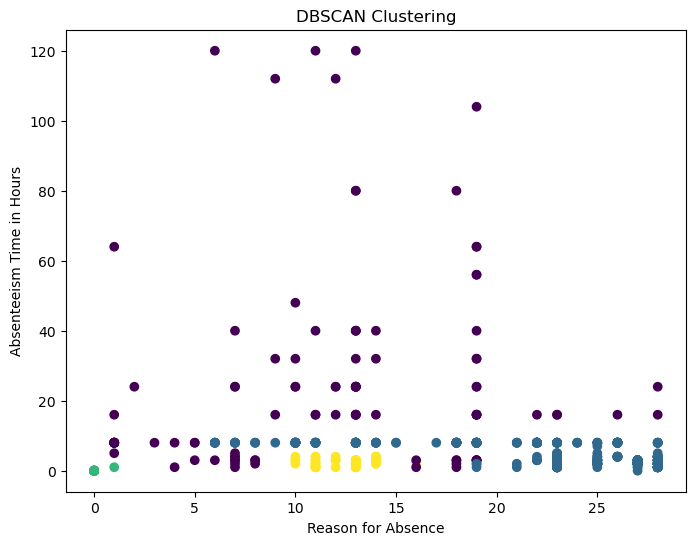

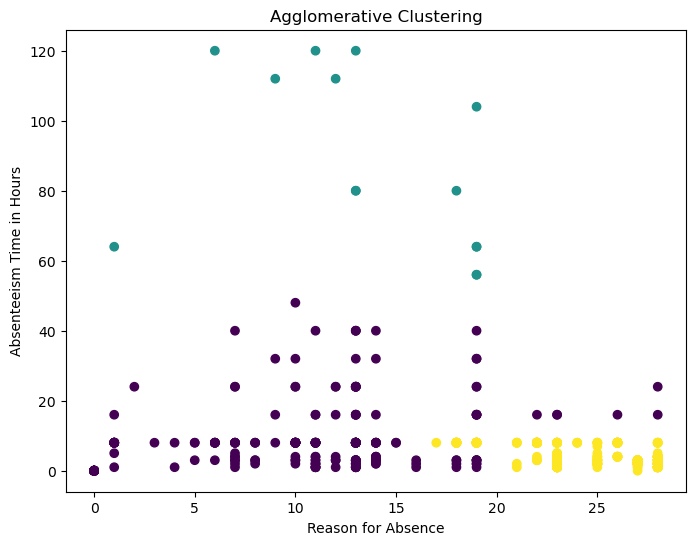

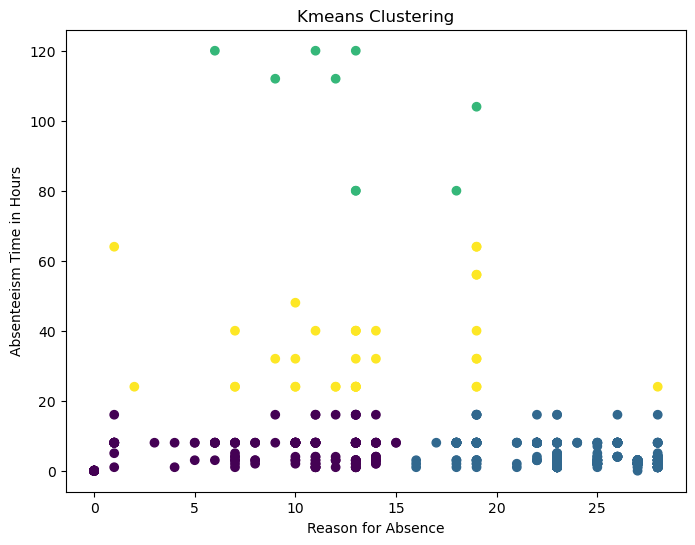

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(original_df['reason_for_absence'], original_df['absenteeism_time_in_hours'], c=dbs_labels_imp_fea)
plt.title('DBSCAN Clustering')
plt.xlabel('Reason for Absence')
plt.ylabel('Absenteeism Time in Hours')

plt.figure(figsize=(8,6))
plt.scatter(original_df['reason_for_absence'], original_df['absenteeism_time_in_hours'], c=agg_labels_imp_fea)
plt.title('Agglomerative Clustering')
plt.xlabel('Reason for Absence')
plt.ylabel('Absenteeism Time in Hours')

plt.figure(figsize=(8,6))
plt.scatter(original_df['reason_for_absence'], original_df['absenteeism_time_in_hours'], c=km_labels_imp_fea)
plt.title('Kmeans Clustering')
plt.xlabel('Reason for Absence')
plt.ylabel('Absenteeism Time in Hours')
plt.show()

### Kmeans is giving the good clusters with important  Features 

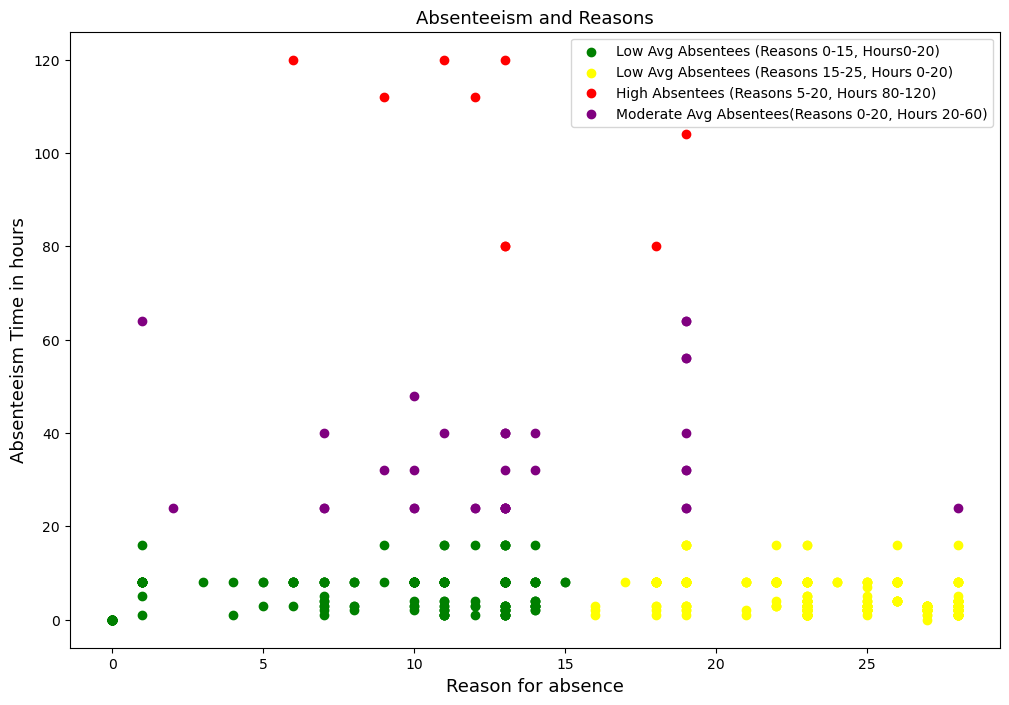

In [117]:
import matplotlib.pyplot as plt
segments = ['Low Avg Absentees (Reasons 0-15, Hours0-20)','Low Avg Absentees (Reasons 15-25, Hours 0-20)',
           'High Absentees (Reasons 5-20, Hours 80-120)','Moderate Avg Absentees(Reasons 0-20, Hours 20-60)']
mycolors=['green','yellow','red','purple']
plt.figure(figsize=(12,8))



for i in range(4):
    
        plt.scatter(x=original_df.loc[(km_labels_imp_fea==i), 'reason_for_absence'],
                    y=original_df.loc[(km_labels_imp_fea==i), 'absenteeism_time_in_hours'],
                    c=mycolors[i],label=segments[i])

plt.title('Absenteeism and Reasons', size=13)
plt.xlabel('Reason for absence', size=13)
plt.ylabel('Absenteeism Time in hours', size=13)
plt.legend(segments, loc='upper right', fontsize=10)
plt.show()

In [ ]:

segments =['Low Avg Absentees (Reasons 15-25, Hours 0-20)','High Absentees (Reasons 5-20, Hours 80-120)',
          'Low Avg Absentees (Reasons 0-15, Hours0-20)','Moderate Avg Absentees(Reasons 0-20, Hours 20-60)']
])

### .predict

In [118]:
import statistics as st
## age , son , social drinker , social smoker ,pet , bmi 
colums = ['reason_for_absence', 'month_of_absence', 'day_of_the_week', 'seasons',
           'transportation_expense', 'distance_from_residence_to_work',
           'service_time', 'age', 'work_load_average_day', 'hit_target',
           'disciplinary_failure', 'education', 'son', 'social_drinker',
           'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
           'absenteeism_time_in_hours']

predict_df = pd.DataFrame(columns=colums)

predict_df['reason_for_absence'] = [st.mode(df['reason_for_absence'])]

predict_df['month_of_absence'] = [st.mode(df['month_of_absence'])]

predict_df['day_of_the_week'] = [st.mode(df['day_of_the_week'])]

predict_df['seasons'] = [st.mode(df['seasons'])]

predict_df['transportation_expense'] = [st.mode(df['transportation_expense'])]

predict_df['distance_from_residence_to_work'] = [st.mode(df['distance_from_residence_to_work'])]

predict_df['service_time'] = [st.mode(df['service_time'])]

for Age in range(10,61):
    Age = int(input('Enter the Age Between 10-60 -->'))
    if Age>=10 and Age<=60:
        predict_df['age'] = [Age]
    else:
        print('Wrong input!')
    break
    
print('-'*97)
    
predict_df['work_load_average_day'] = [st.mode(df['work_load_average_day'])]

predict_df['hit_target'] = [st.mode(df['hit_target'])]

for Disciplinary in range(0,1):
    Disciplinary = int(input('Enter Disciplinary Status If Yes:1,If No:0 -->'))
    if Disciplinary>=0 and Disciplinary<=1:
        predict_df['disciplinary_failure'] = [Disciplinary]
    else:
        print('Wrong input!')
    break

print('-'*97)    
    
predict_df['education'] = [st.mode(df['education'])]

for Son in range(0,5):
    Son = int(input('Enter No of Sons 0-4-->'))
    if Son>=0 and Son<=4:
        predict_df['son'] = [Son]
    else:
        print('Wrong input!')
    break

print('-'*97)
    
for Drinking in range(0,2):
    Drinking = int(input('Enter Drinking Status If Yes:1, If No:0-->'))
    if Drinking>=0 and Drinking<=1:
        predict_df['social_drinker'] = [Drinking]
    else:
        print('Wrong input!')
    break

print('-'*97)
    
for smoking in range(0,2):
    smoking = int(input('Enter smoking Status If Yes:1, If No:0-->'))
    if smoking>=0 and Drinking<=1:
        predict_df['social_smoker'] = [smoking]
    else:
        print('Wrong input!')
    break

print('-'*97)

for pet in range(0,7):
    pet = int(input('Enter No of pets Between 0-6-->'))
    if pet>=0 and pet<=6:
        predict_df['pet'] = [pet]
    else:
        print('Wrong input!')
    break
    
print('_'*97)
print('_'*97)

predict_df['weight'] = [st.mode(df['weight'])]

predict_df['height'] = [st.mode(df['height'])]

predict_df['body_mass_index'] = [st.mode(df['body_mass_index'])]

predict_df['absenteeism_time_in_hours'] = [st.mode(df['absenteeism_time_in_hours'])]

new_df = pd.concat([df,predict_df],axis=0)

for i in encode_columns:
    new_df[i] = encoder.fit_transform(new_df[i])
    
for i in scale_columns:
    new_df[i] = scaler.transform(new_df[i].to_numpy().reshape(-1,1))
    
km_without_pca.transform(new_df)


last_row = new_df.iloc[-1:,:]

cluster_number = km_without_pca.predict(last_row)[0]

print('Cluster Number is -->', cluster_number)

Enter the Age Between 10-60 -->60
-------------------------------------------------------------------------------------------------
Enter Disciplinary Status If Yes:1,If No:0 -->1
-------------------------------------------------------------------------------------------------
Enter No of Sons 0-4-->1
-------------------------------------------------------------------------------------------------
Enter Drinking Status If Yes:1, If No:0-->1
-------------------------------------------------------------------------------------------------
Enter smoking Status If Yes:1, If No:0-->1
-------------------------------------------------------------------------------------------------
Enter No of pets Between 0-6-->1
_________________________________________________________________________________________________
_________________________________________________________________________________________________
Cluster Number is --> 0
